In [ ]:
pip install tensorflow==1.15.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==1.15.0


In [ ]:
pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 26.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
NHIS2022 = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/adult22.csv')

In [ ]:
# Dataset size (row, column)
NHIS2022.shape

(27651, 637)

In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['CHDEV_A'].value_counts()

print(class_counts)

CHDEV_A
2    25845
1     1726
9       54
7       26
Name: count, dtype: int64


In [ ]:
NHIS2022 = NHIS2022[["MARITAL_A", "HOUTENURE_A", "AFVET_A", "HEIGHTTC_A", "HISPALLP_A", "SEX_A", "PCNTLT18TC", "MAXEDUCP_A", "RATCAT_A", "COPDEV_A", "CHDEV_A", "DEPEV_A", "DIBEV_A", "ARTHEV_A", "STREV_A", "ASEV_A", "CHLEV_A", "HYPEV_A", "PHSTAT_A", "BMICAT_A", "VISIONDF_A", "DIFF_A", "SOCERRNDS_A", "SHTFLU12M_A", "MIEV_A"]]

In [ ]:
# Count the total number of rows with missing values
total_rows_with_missing = NHIS2022.isnull().any(axis=1).sum()

print(f'Total rows with missing values: {total_rows_with_missing}')

Total rows with missing values: 88


In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
    'DRKSTAT_A': [],  # No refuse values specified for this column
    'FRJUICNO_A': [997, 998, 999],
}

# Initialize a variable to count the number of rows with refuse values
rows_with_refuse_values = 0

# Iterate through columns and count rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2022.columns:
        rows_with_refuse_values += len(NHIS2022[NHIS2022[column].isin(refuse)])

# For columns without specified refuse values, count rows with refuse values
for column in NHIS2022.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        rows_with_refuse_values += len(NHIS2022[NHIS2022[column].isin(refuse)])

# Print the total number of rows with refuse values
print(f'Total number of rows with refuse values: {rows_with_refuse_values}')

Total number of rows with refuse values: 5433


In [ ]:
# Droping all null values
NHIS2022 = NHIS2022.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
    'DRKSTAT_A': [],  # No refuse values specified for this column
    'FRJUICNO_A': [997, 998, 999],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2022.columns:
        NHIS2022 = NHIS2022[~NHIS2022[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in NHIS2022.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        NHIS2022 = NHIS2022[~NHIS2022[column].isin(refuse)]

In [ ]:
# Dataset size (row, column)
NHIS2022.shape

(25324, 25)

In [ ]:
NHIS2022.isnull().sum()

,0
MARITAL_A,0
HOUTENURE_A,0
AFVET_A,0
HEIGHTTC_A,0
HISPALLP_A,0
SEX_A,0
PCNTLT18TC,0
MAXEDUCP_A,0
RATCAT_A,0
COPDEV_A,0


In [ ]:
# Target label class count
unique_classes = NHIS2022['CHDEV_A'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['CHDEV_A'].value_counts()

print(class_counts)

CHDEV_A
2    23746
1     1578
Name: count, dtype: int64


In [ ]:
# Separating data
Healthy = NHIS2022[NHIS2022['CHDEV_A']==2]
Affected = NHIS2022[NHIS2022['CHDEV_A']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.3, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['CHDEV_A'], axis=1) # Input features
y_train = train['CHDEV_A'] # Target label

x_test = test.drop(['CHDEV_A'], axis=1) # Input features
y_test = test['CHDEV_A'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 11873
Class 1 count: 1104


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 11873
Class 1 count: 474


In [ ]:
# Target label class count
unique_classes = NHIS2022['CHDEV_A'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['CHDEV_A'].value_counts()

print(class_counts)

CHDEV_A
2    23746
1     1578
Name: count, dtype: int64


In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

# Save oversampled data
x_test.to_csv('/content/drive/MyDrive/Heart-Disease/Data/x_test.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Heart-Disease/Data/y_test.csv', index=False)
"""

In [ ]:
# Load test data
x_test = pd.read_csv('/content/drive/MyDrive/Heart-Disease/Data/x_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Heart-Disease/Data/y_test.csv')

In [ ]:
"""
# Convert DataFrame to NumPy array
x_test = x_test.values
y_test = y_test.values
"""

### Adaptive Refinement sampling

In [ ]:
from sklearn.neighbors import NearestNeighbors

# ---- Step 1. Identifing minority and majority classes ----
minority_class = y_train.value_counts().idxmin()
majority_class = y_train.value_counts().idxmax()

X_minority = x_train[y_train == minority_class]
X_majority = x_train[y_train == majority_class]

# ---- Step 2. Defining Adaptive Refinement Sampling ----
def adaptive_refinement_sampling(X_minority, X_majority, beta=0.6, k=5):
    """
    Implements the Adaptive Refinement Sampling (Sᴬᴿ) method.

    Parameters:
        X_minority: ndarray - minority samples
        X_majority: ndarray - majority samples
        beta: float - scaling factor for refinement
        k: int - number of nearest neighbors considered
    Returns:
        X_resampled, y_resampled
    """

    # Nearest neighbors for both classes
    nn_minority = NearestNeighbors(n_neighbors=k+1).fit(X_minority)
    nn_majority = NearestNeighbors(n_neighbors=k).fit(X_majority)

    synthetic_samples = []

    for M in X_minority:
        # Finding k nearest minority and majority neighbors
        distances_min, indices_min = nn_minority.kneighbors([M])
        distances_maj, indices_maj = nn_majority.kneighbors([M])

        # Excluding self for minority
        distances_min, indices_min = distances_min[0][1:], indices_min[0][1:]
        distances_maj, indices_maj = distances_maj[0], indices_maj[0]

        # Computing weights
        w_i = np.exp(-distances_maj / (np.max(distances_maj) + 1e-6))  # for majority
        λ_i = np.exp(-distances_min / (np.max(distances_min) + 1e-6))  # for minority

        # Normalizing weights
        w_i /= np.sum(w_i)
        λ_i /= np.sum(λ_i)

        # Estimating local density (minority vs majority ratio)
        density_ratio = len(distances_maj) / (len(distances_min) + 1e-6)

        # If minority sample is in a sparse region → generating synthetic points
        if density_ratio > 1.2:
            num_synthetic = int(np.ceil(beta * density_ratio))
            for _ in range(num_synthetic):
                # Randomly pick one minority neighbor for interpolation
                idx = np.random.choice(len(indices_min))
                C_i = X_minority[indices_min[idx]]
                lam = λ_i[idx]
                # Linear interpolation between M and C_i
                synthetic = M + lam * (C_i - M)
                synthetic_samples.append(synthetic)

    X_synthetic = np.array(synthetic_samples)
    y_synthetic = np.array([minority_class] * len(X_synthetic))

    # ---- Step 3. Removing overlapping majority samples ----
    nn_check = NearestNeighbors(n_neighbors=1).fit(X_minority)
    distances, _ = nn_check.kneighbors(X_majority)
    overlap_threshold = np.percentile(distances, 5)  # bottom 5% considered overlap
    X_majority_cleaned = X_majority[distances.flatten() > overlap_threshold]

    # Combining new data
    X_resampled = np.vstack((X_majority_cleaned, X_minority, X_synthetic))
    y_resampled = np.hstack(([majority_class]*len(X_majority_cleaned),
                             [minority_class]*len(X_minority),
                             y_synthetic))

    return X_resampled, y_resampled


# ---- Step 4. Appling the Adaptive Refinement Sampling ----
X_train_resampled, y_train_resampled = adaptive_refinement_sampling(X_minority.values, X_majority.values)

print("Class distribution in resampled dataset:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution in the resampled dataset:
1    173404
0    172472
dtype: int64


In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
X_train_resampled = pd.DataFrame(X_train_resampled)
y_train_resampled = pd.DataFrame(y_train_resampled)

# Save oversampled data
X_train_resampled.to_csv('/content/drive/MyDrive/Heart-Disease/Data/x_train_resampled.csv', index=False)
y_train_resampled.to_csv('/content/drive/MyDrive/Heart-Disease/Data/y_train_resampled.csv', index=False)
"""

In [ ]:
# Load oversampled data
X_train_resampled = pd.read_csv('/content/drive/MyDrive/Heart-Disease/Data/x_train_resampled.csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/Heart-Disease/Data/y_train_resampled.csv')

In [ ]:
"""
# Convert DataFrame to NumPy array
X_train_resampled = X_train_resampled.values
y_train_resampled = y_train_resampled.values
"""

In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_train_resampled == 0)
class_1_count = np.sum(y_train_resampled == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 0    11873
dtype: int64
Class 1 count: 0    11797
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
import copy

x_train = copy.deepcopy(X_train_resampled)
y_train = copy.deepcopy(y_train_resampled)

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s eta 0:00:00


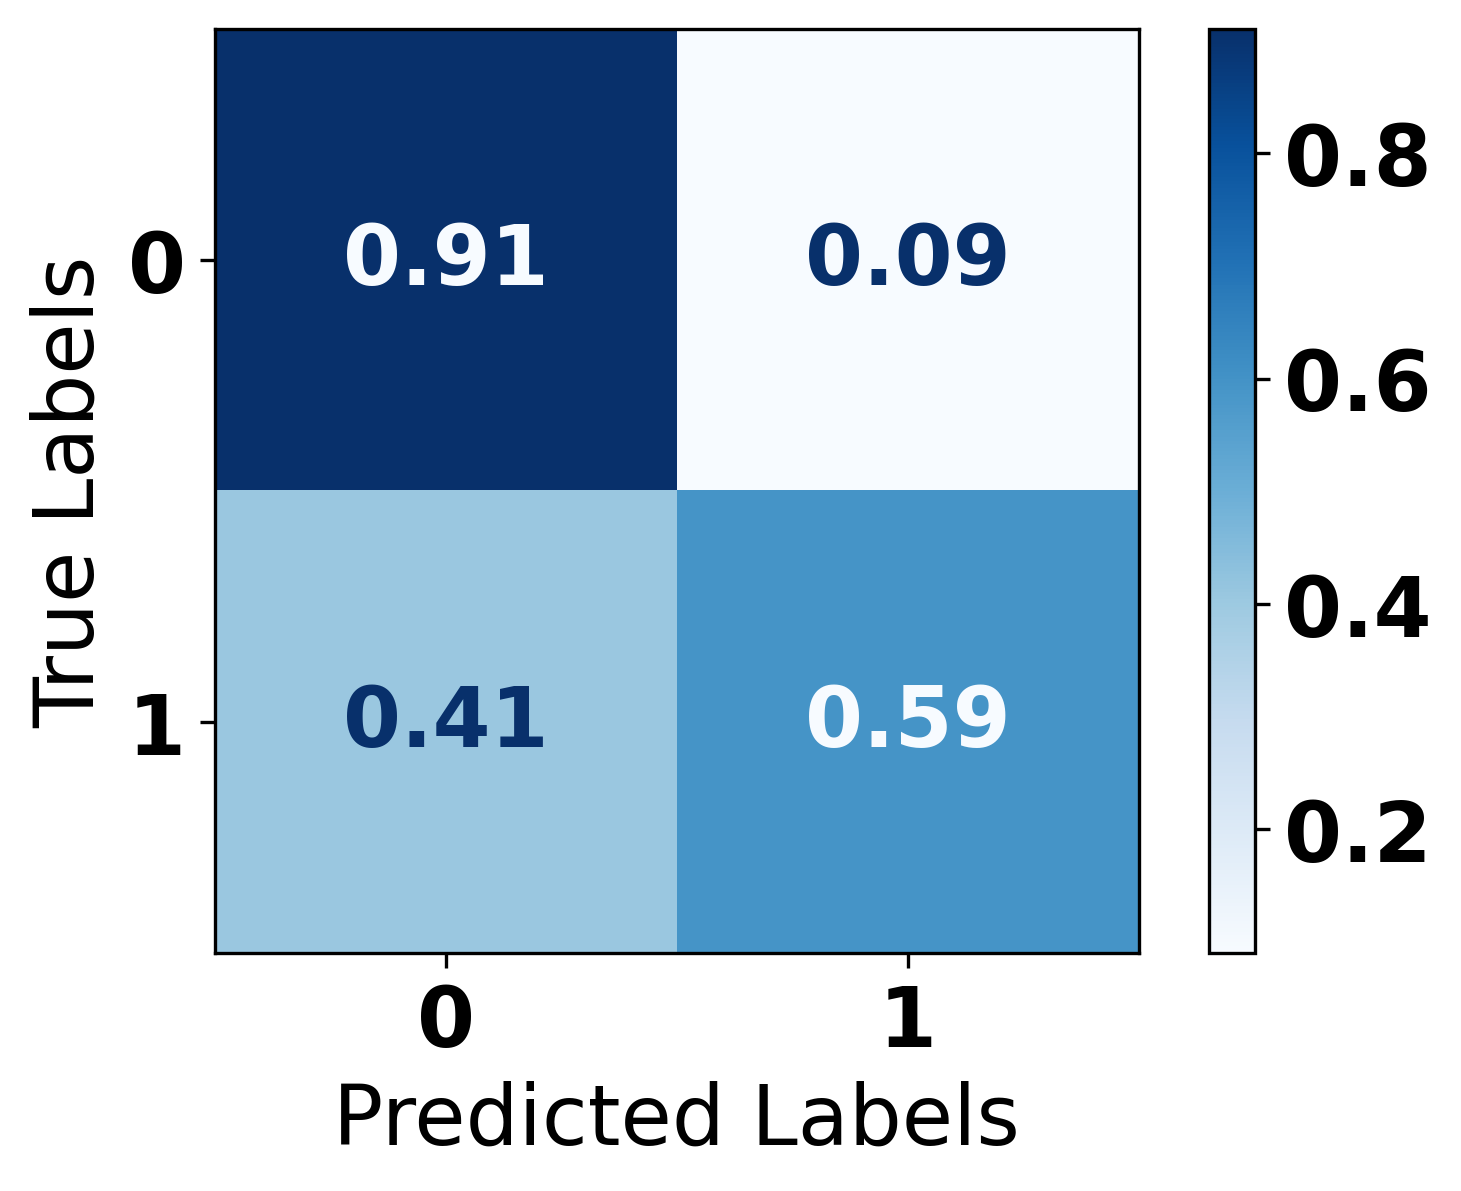

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.91      0.95     11873
     Class 1       0.21      0.59      0.31       474

    accuracy                           0.90     12347
   macro avg       0.60      0.75      0.63     12347
weighted avg       0.95      0.90      0.92     12347

Train Accuracy: 0.9647655259822561
Test Accuracy: 0.8982748845873492


In [ ]:
!pip install catboost

# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the CatBoost model
catboost = CatBoostClassifier(random_state=7, verbose=0)  # Set verbose to 0 to disable logging
catboost.fit(x_train, y_train)

# Predict on the test set
y_pred = catboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = catboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(catboost, '/content/drive/MyDrive/Heart-Disease/Model/CatBoost.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/CatBoost.pkl']

In [ ]:
import joblib

# Load the model from file
CatBoost = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/CatBoost.pkl')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 11797, number of negative: 11873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 23670, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498395 -> initscore=-0.006422
[LightGBM] [Info] Start training from score -0.006422


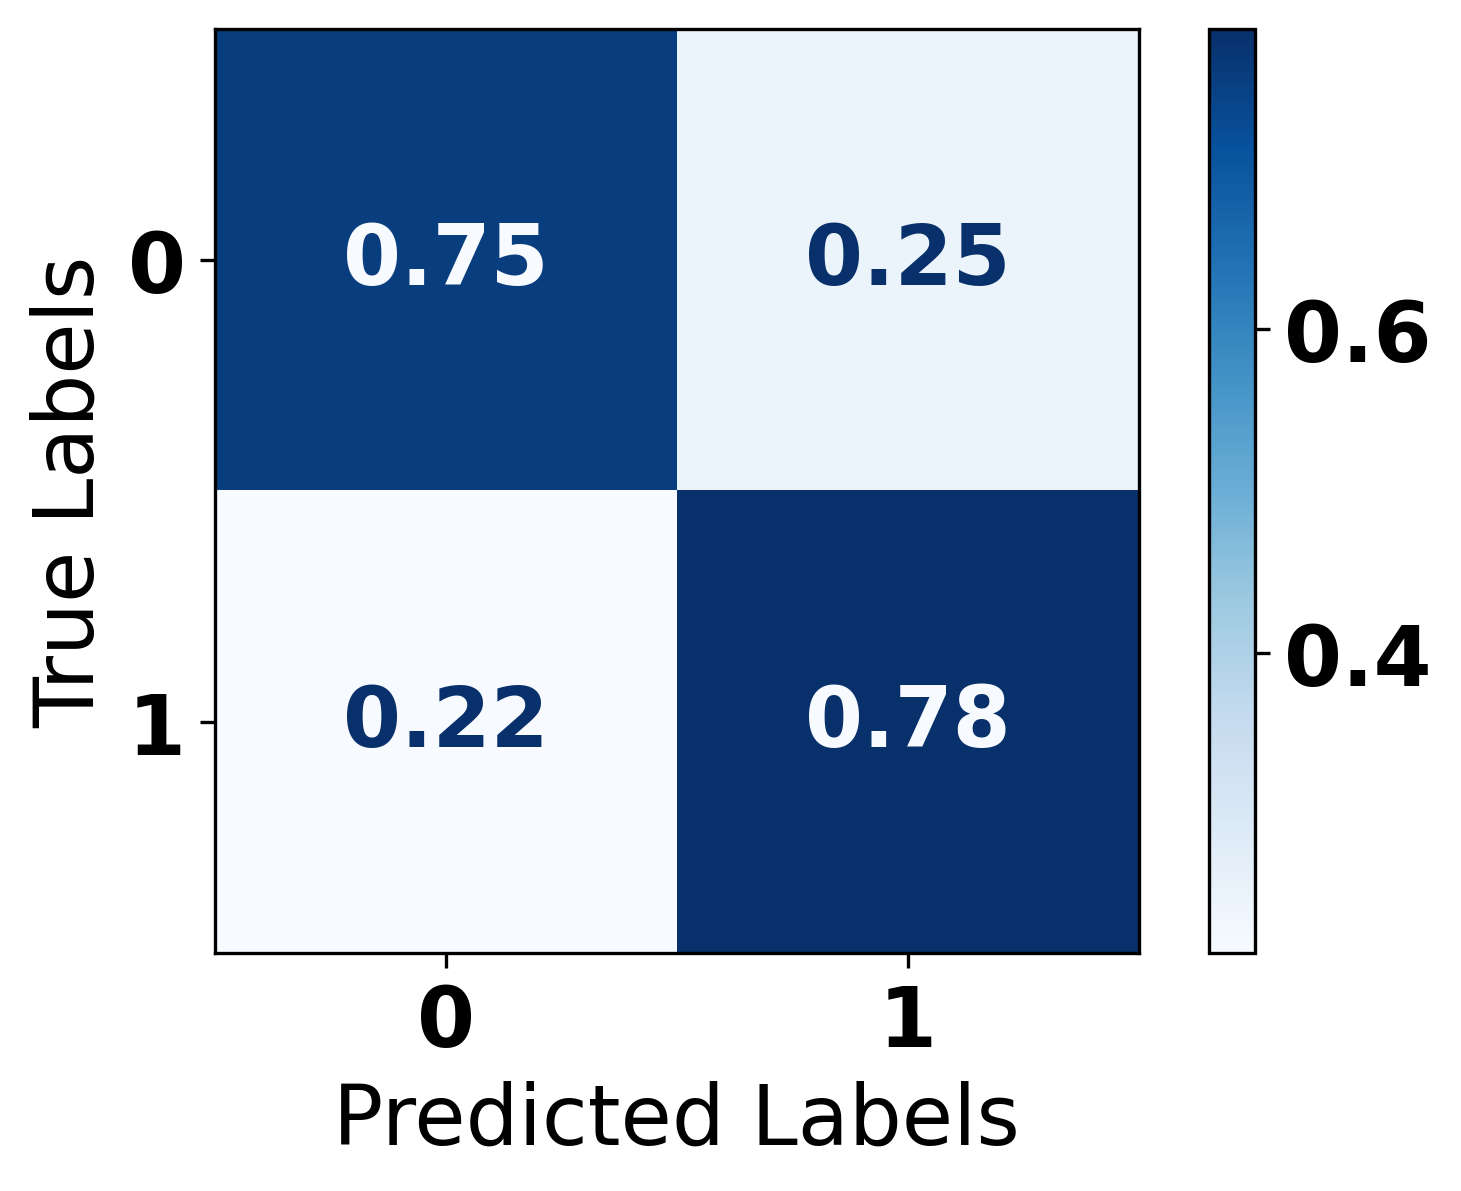

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.75      0.86     11873
     Class 1       0.11      0.78      0.20       474

    accuracy                           0.76     12347
   macro avg       0.55      0.77      0.53     12347
weighted avg       0.96      0.76      0.83     12347

Train Accuracy: 0.7846218842416561
Test Accuracy: 0.7550012148700089


In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the LightGBM model
lgbm = lgb.LGBMClassifier(
    random_state=2,
    n_estimators=4,         # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    max_depth=1,              # Maximum tree depth for base learners
    num_leaves=2,            # Maximum number of leaves in one tree
    subsample=0.1,            # Subsample ratio of the training instances
    colsample_bytree=0.3      # Subsample ratio of columns when constructing each tree
)
lgbm.fit(x_train, y_train)

# Predict on the test set
y_pred = lgbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = lgbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(lgbm, '/content/drive/MyDrive/Heart-Disease/Model/LGBM.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/LGBM.pkl']

In [ ]:
import joblib

# Load the model from file
LGBM = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/LGBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


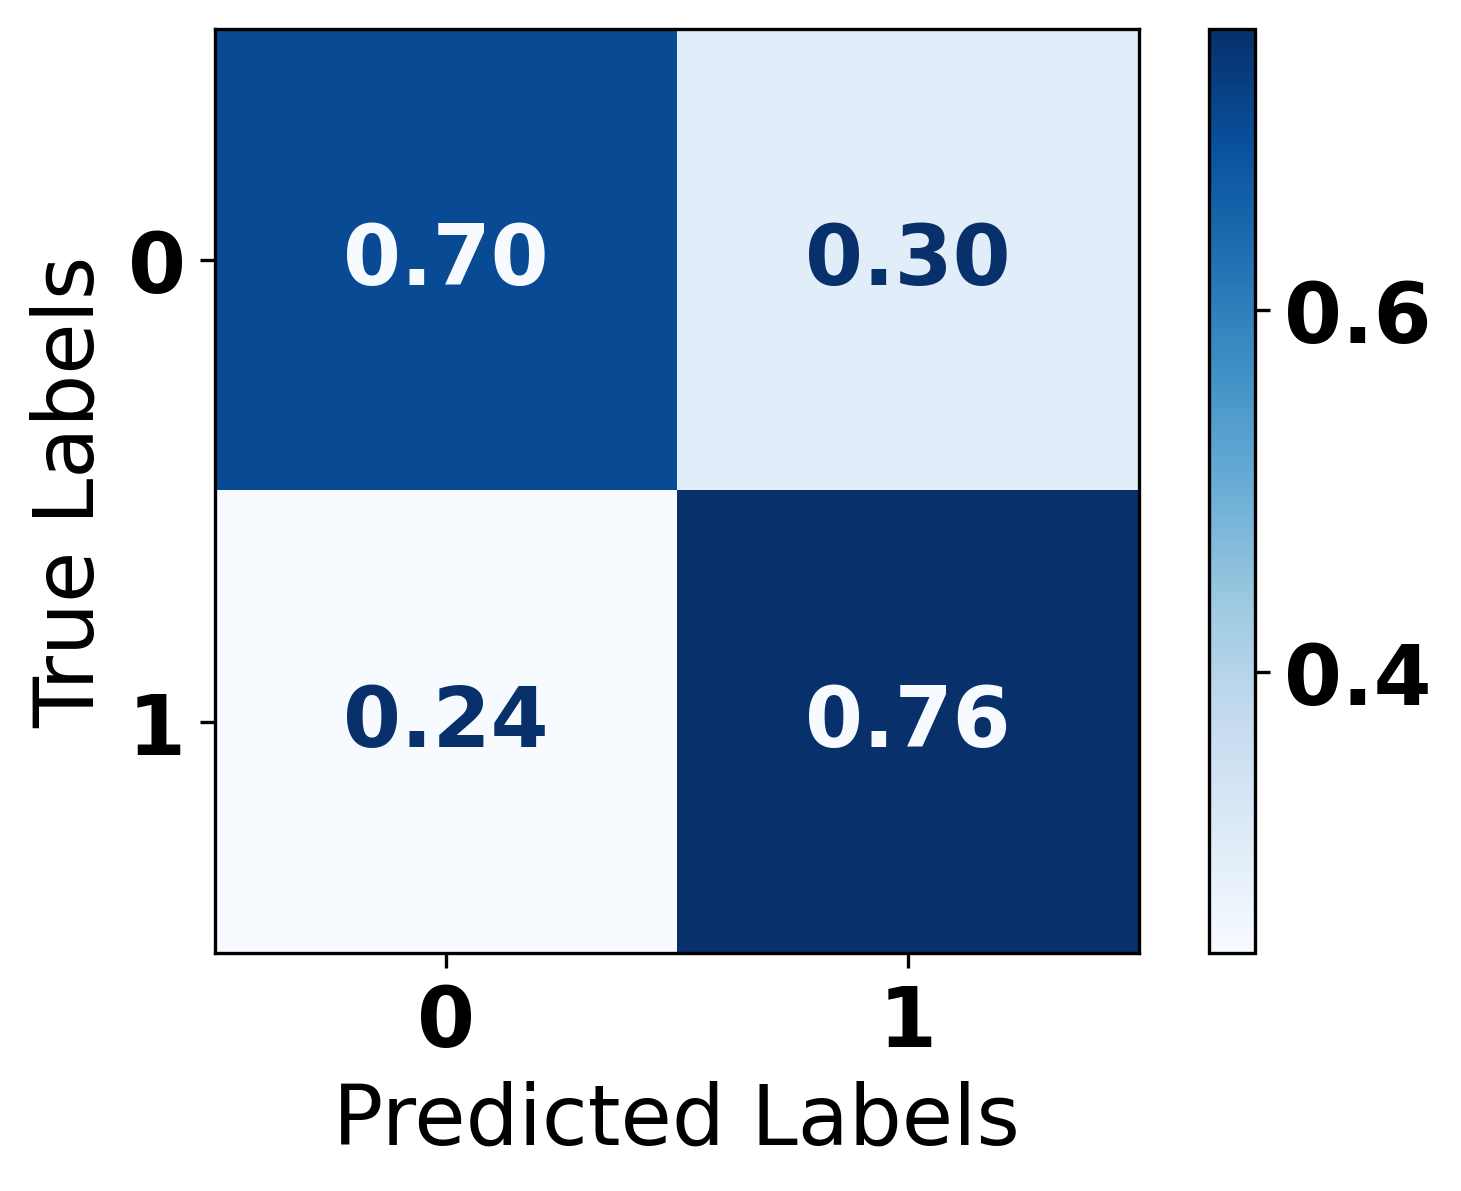

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.70      0.82     11873
     Class 1       0.09      0.76      0.16       474

    accuracy                           0.70     12347
   macro avg       0.54      0.73      0.49     12347
weighted avg       0.95      0.70      0.79     12347

Train Accuracy: 0.7440642163075624
Test Accuracy: 0.7028427958208472


In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Gradient Boosting Machine model
gbm = GradientBoostingClassifier(
    random_state=2,
    n_estimators=4,        # Number of boosting stages to be run
    learning_rate=0.1,       # Learning rate shrinks the contribution of each tree by learning_rate
    max_depth=1,             # Maximum depth of the individual regression estimators
    subsample=0.9,           # Fraction of samples used for fitting the individual base learners
    max_features='sqrt'      # Number of features to consider when looking for the best split
)
gbm.fit(x_train, y_train)

# Predict on the test set
y_pred = gbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = gbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(gbm, '/content/drive/MyDrive/Heart-Disease/Model/GBM.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/GBM.pkl']

In [ ]:
import joblib

# Load the model from file
GBM = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/GBM.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


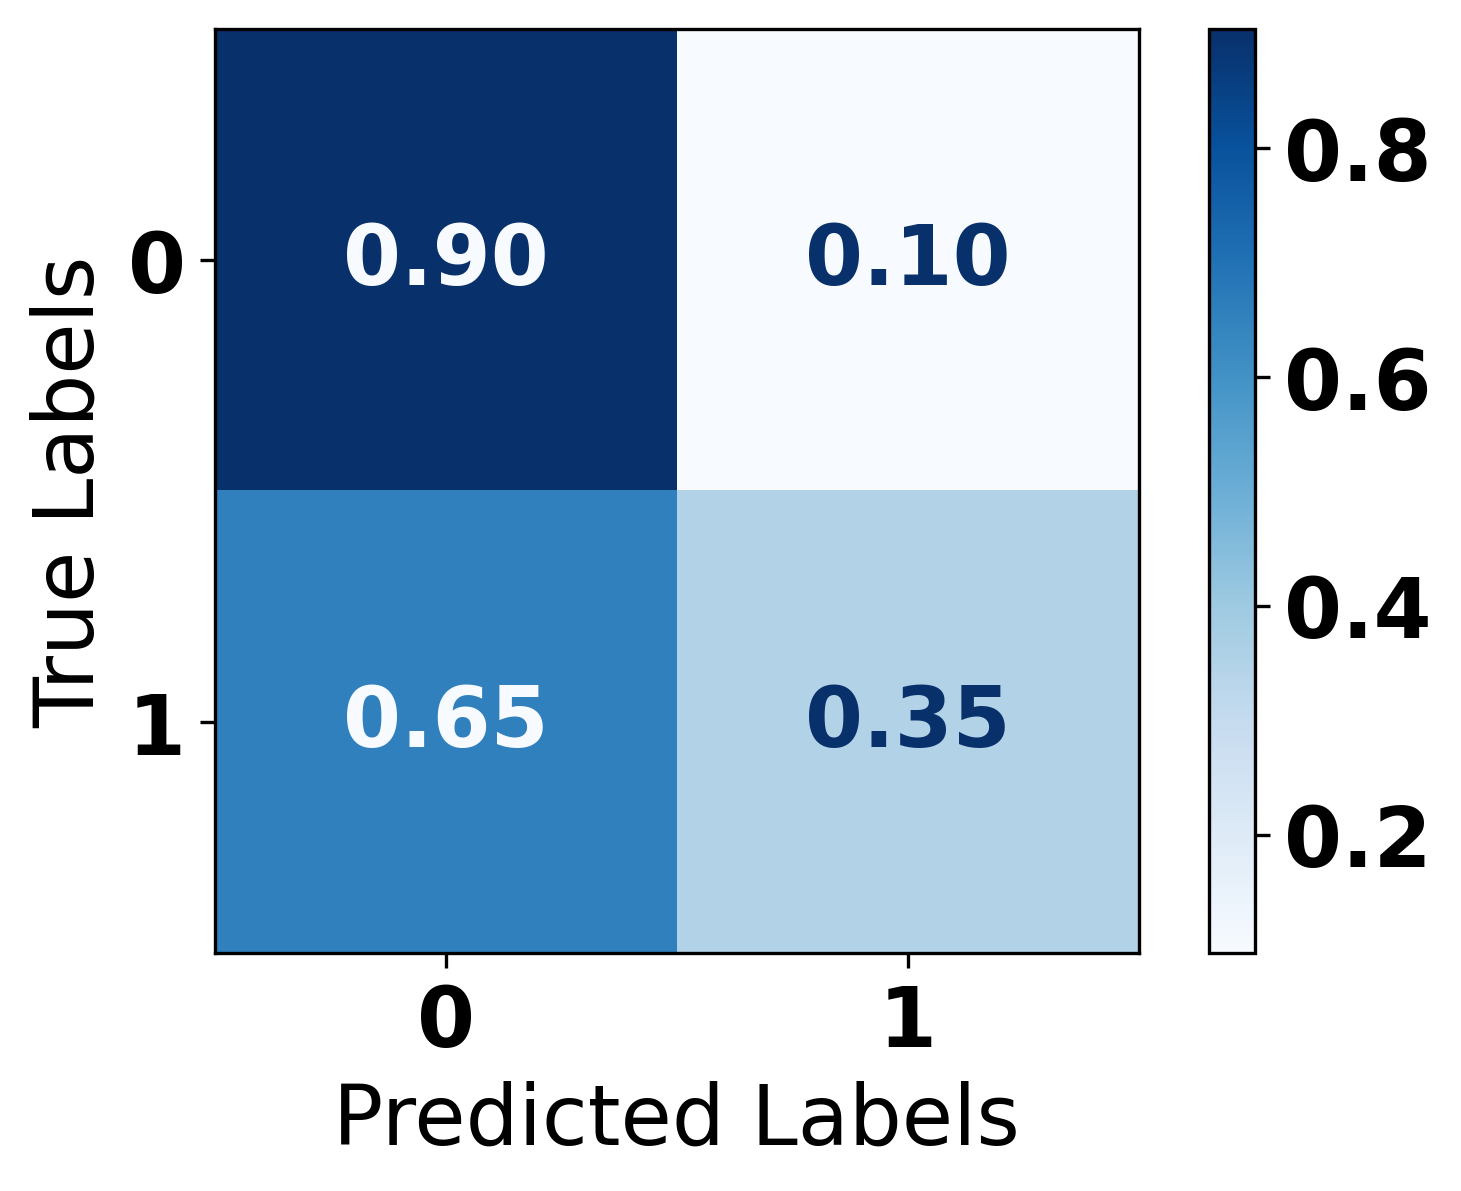

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.90      0.94     11873
     Class 1       0.13      0.35      0.19       474

    accuracy                           0.88     12347
   macro avg       0.55      0.63      0.56     12347
weighted avg       0.94      0.88      0.91     12347

Train Accuracy: 0.9660752006759611
Test Accuracy: 0.882319591803677


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the k-NN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(knn, '/content/drive/MyDrive/Heart-Disease/Model/KNN.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/KNN.pkl']

In [ ]:
import joblib

# Load the model from file
KNN = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/KNN.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


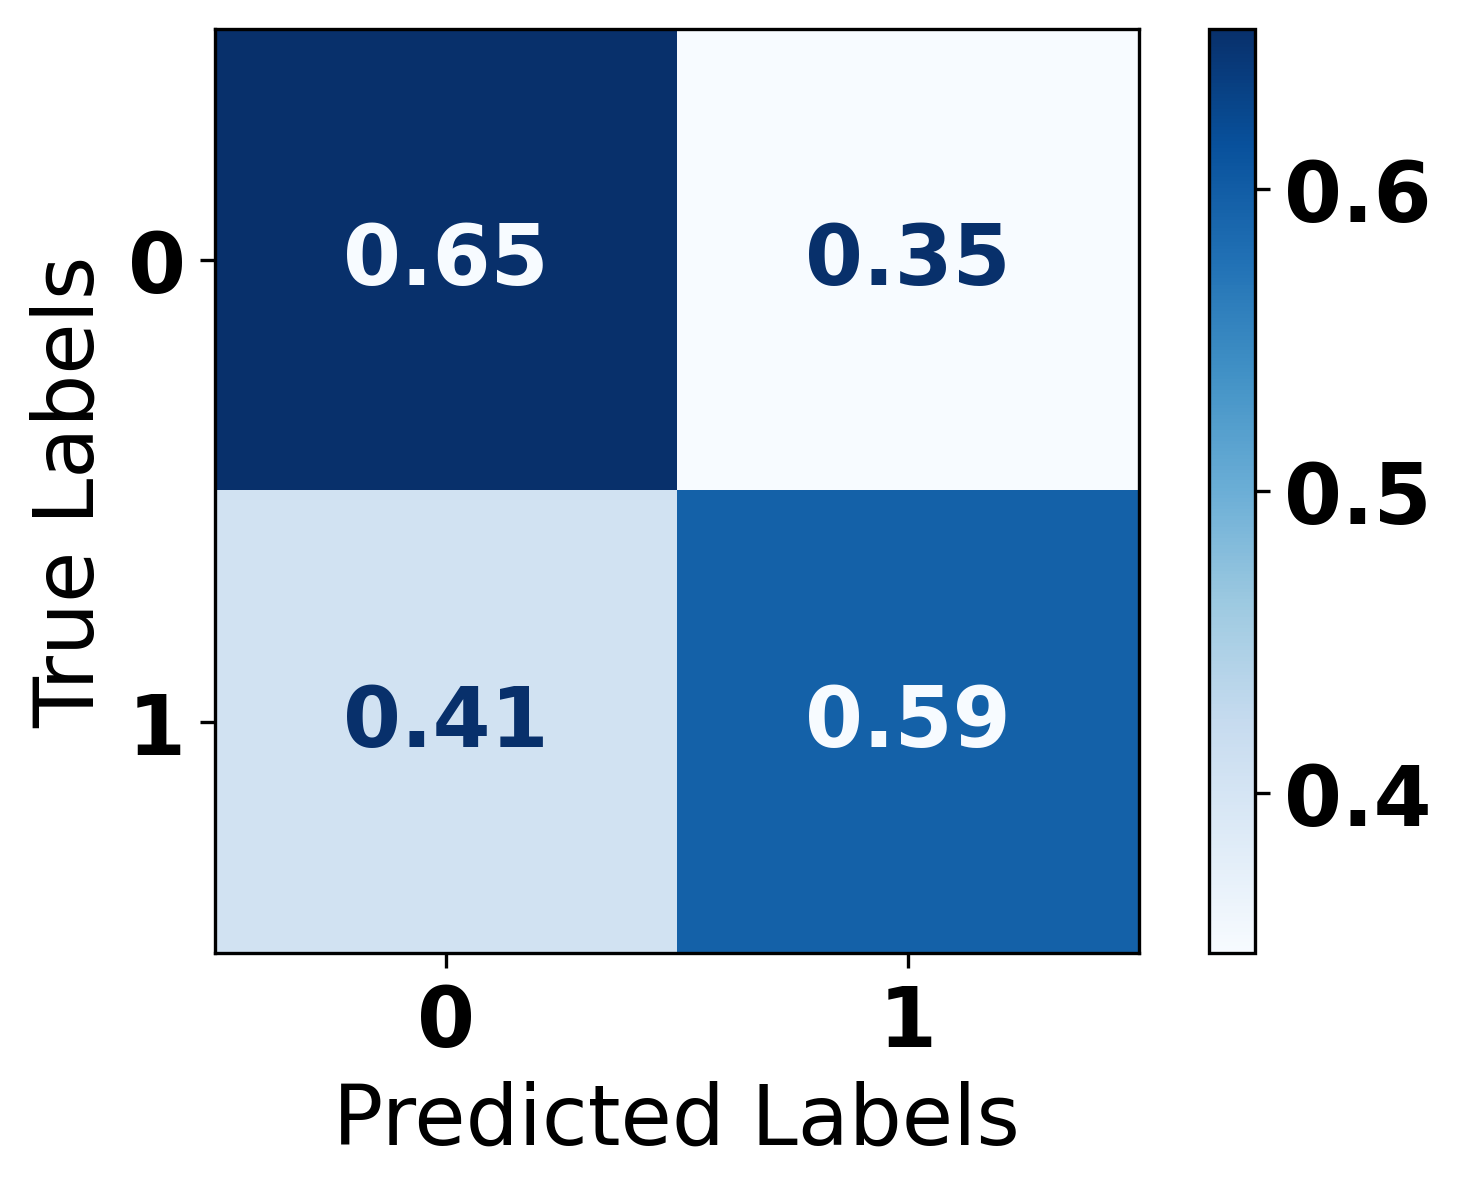

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.65      0.78     11873
     Class 1       0.06      0.59      0.12       474

    accuracy                           0.65     12347
   macro avg       0.52      0.62      0.45     12347
weighted avg       0.94      0.65      0.76     12347

Train Accuracy: 0.6175327418673426
Test Accuracy: 0.6507653681056127


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the Logistic Regression model
log_reg = LogisticRegression(
    random_state=2,
    solver='lbfgs',          # Algorithm to use in the optimization problem
    max_iter=4,           # Maximum number of iterations for solvers to converge
    C=1,                   # Inverse of regularization strength; must be a positive float
    penalty='l2',            # Used to specify the norm used in the penalization
    class_weight='balanced'  # Adjust weights inversely proportional to class frequencies
)
log_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = log_reg.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(log_reg, '/content/drive/MyDrive/Heart-Disease/Model/LR.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/LR.pkl']

In [ ]:
import joblib

# Load the model from file
LR = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/LR.pkl')

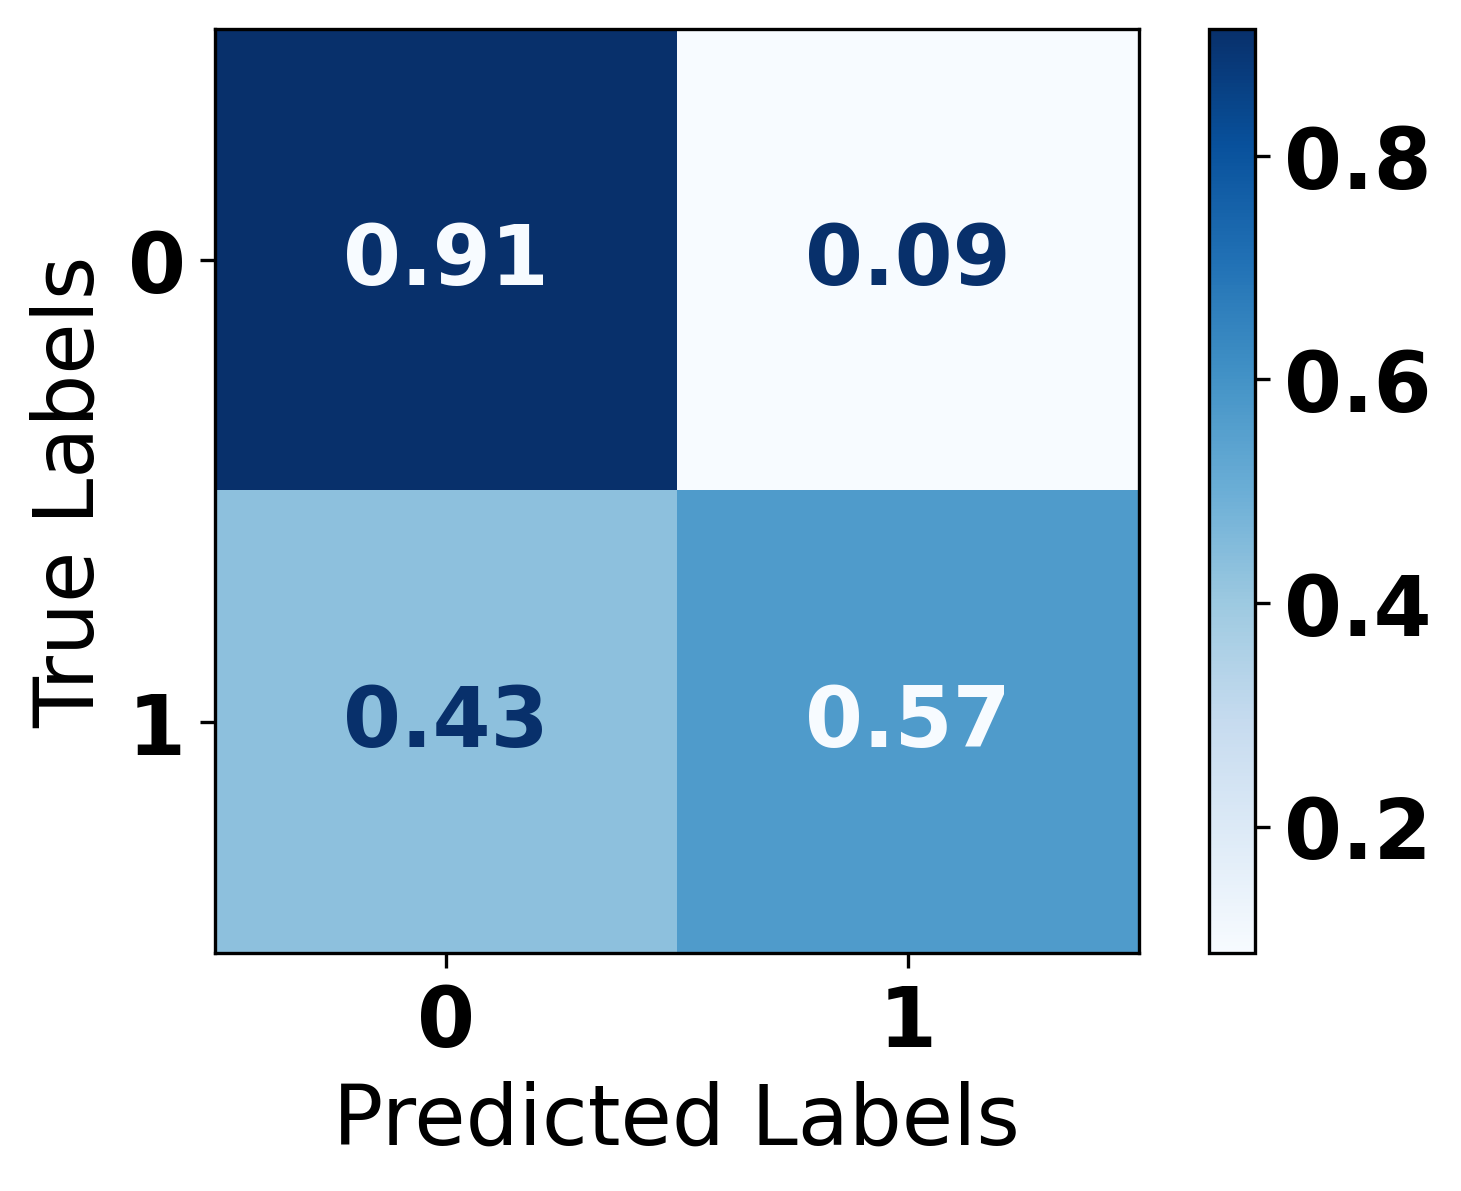

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.91      0.95     11873
     Class 1       0.21      0.57      0.30       474

    accuracy                           0.90     12347
   macro avg       0.59      0.74      0.63     12347
weighted avg       0.95      0.90      0.92     12347

Train Accuracy: 0.9645542881284326
Test Accuracy: 0.8999757025998218


In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create and fit the XGBoost Classifier
XGB = XGBClassifier(random_state=7)
XGB.fit(x_train, y_train)

# Predict on the test set
y_pred = XGB.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = XGB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(XGB, '/content/drive/MyDrive/Heart-Disease/Model/XGB.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/XGB.pkl']

In [ ]:
import joblib

# Load the model from file
XGB = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/XGB.pkl')

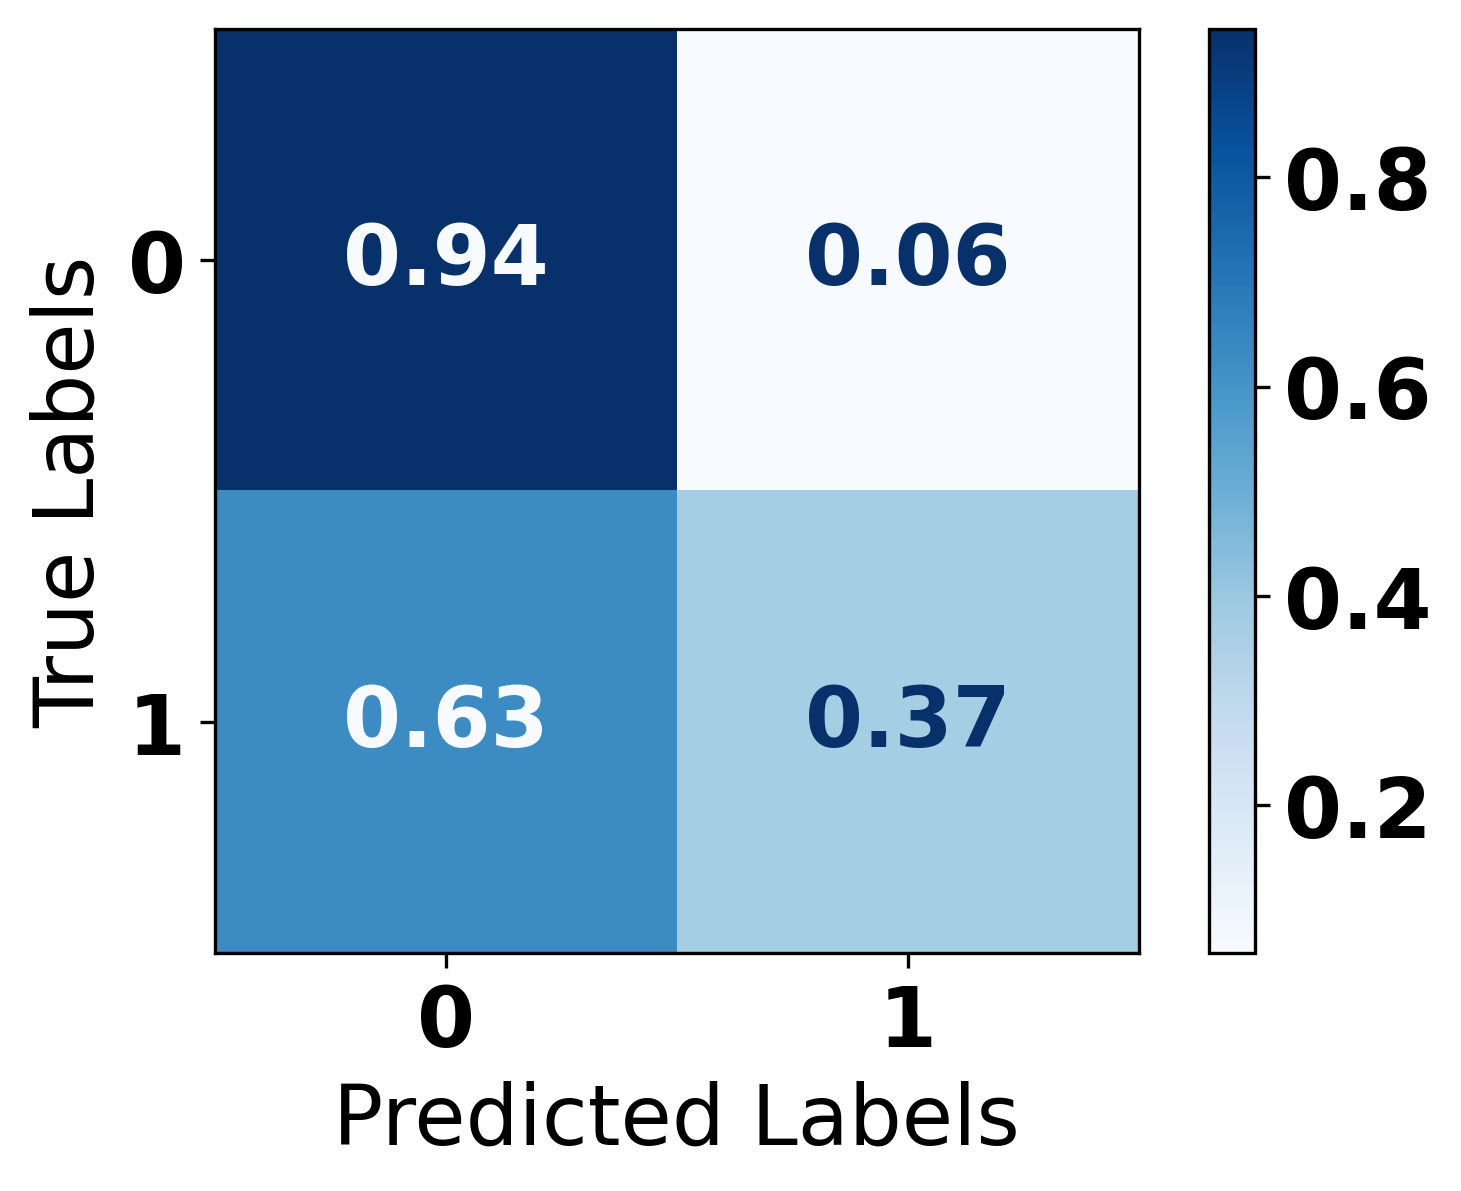

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.94      0.96     11873
     Class 1       0.20      0.37      0.26       474

    accuracy                           0.92     12347
   macro avg       0.59      0.66      0.61     12347
weighted avg       0.94      0.92      0.93     12347

Train Accuracy: 0.9995775242923531
Test Accuracy: 0.9195756054102211


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/MyDrive/Heart-Disease/Model/DT.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/DT.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


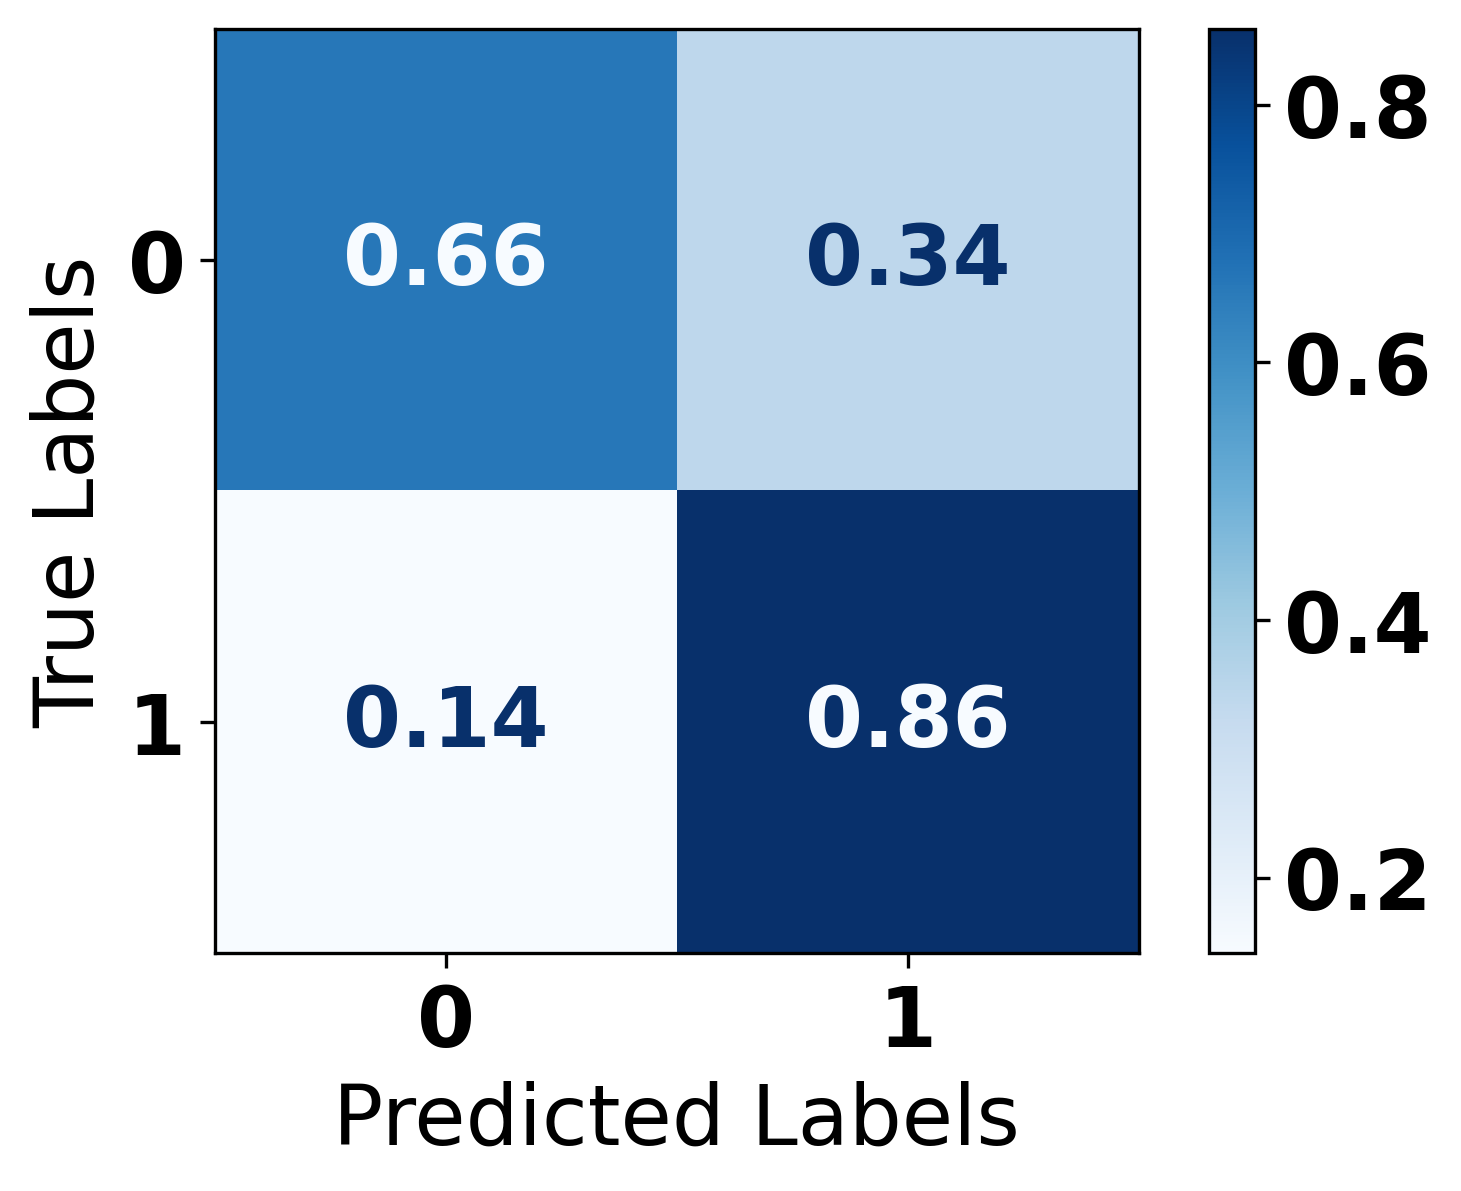

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.66      0.79     11873
     Class 1       0.09      0.86      0.17       474

    accuracy                           0.67     12347
   macro avg       0.54      0.76      0.48     12347
weighted avg       0.96      0.67      0.77     12347

Train Accuracy: 0.7555133079847909
Test Accuracy: 0.6693933749088847


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=2)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/MyDrive/Heart-Disease/Model/RUSBoost.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/RUSBoost.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


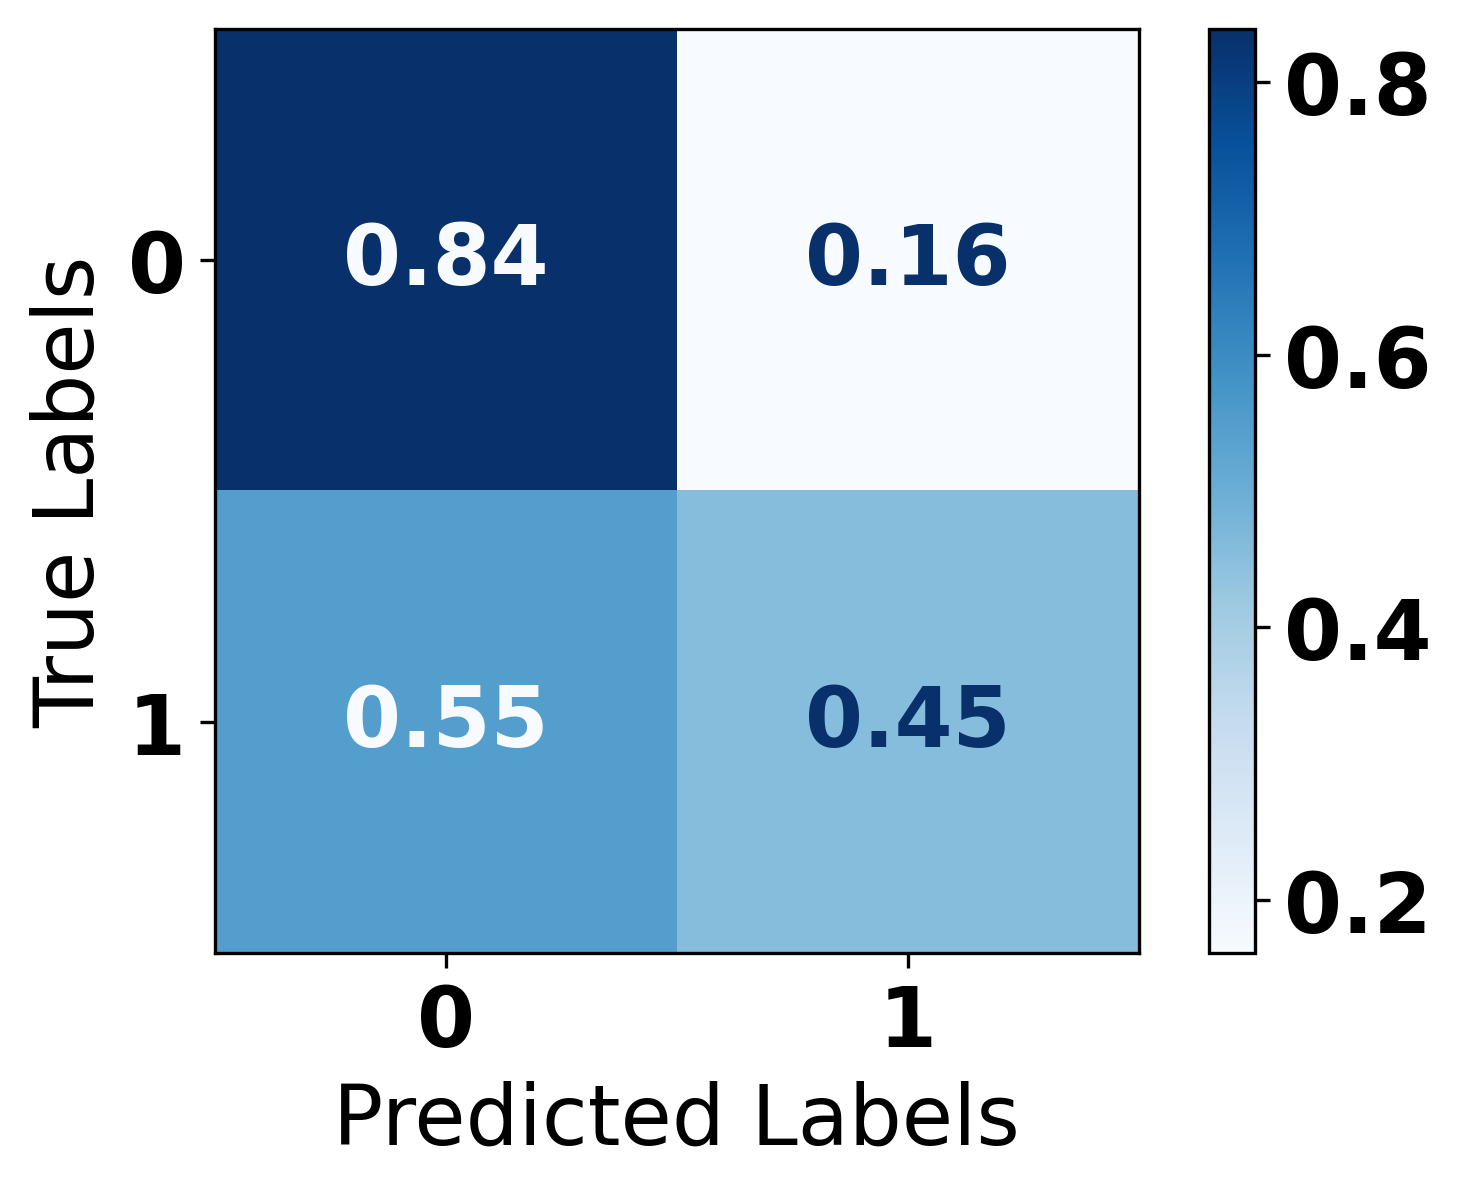

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11873
           1       0.10      0.45      0.17       474

    accuracy                           0.82     12347
   macro avg       0.54      0.65      0.53     12347
weighted avg       0.94      0.82      0.87     12347

Train Accuracy: 0.6474440219687368
Test Accuracy: 0.8243297967117519


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    n_estimators=2,
    max_depth=1,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=1
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/MyDrive/Heart-Disease/Model/RF.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/RF.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


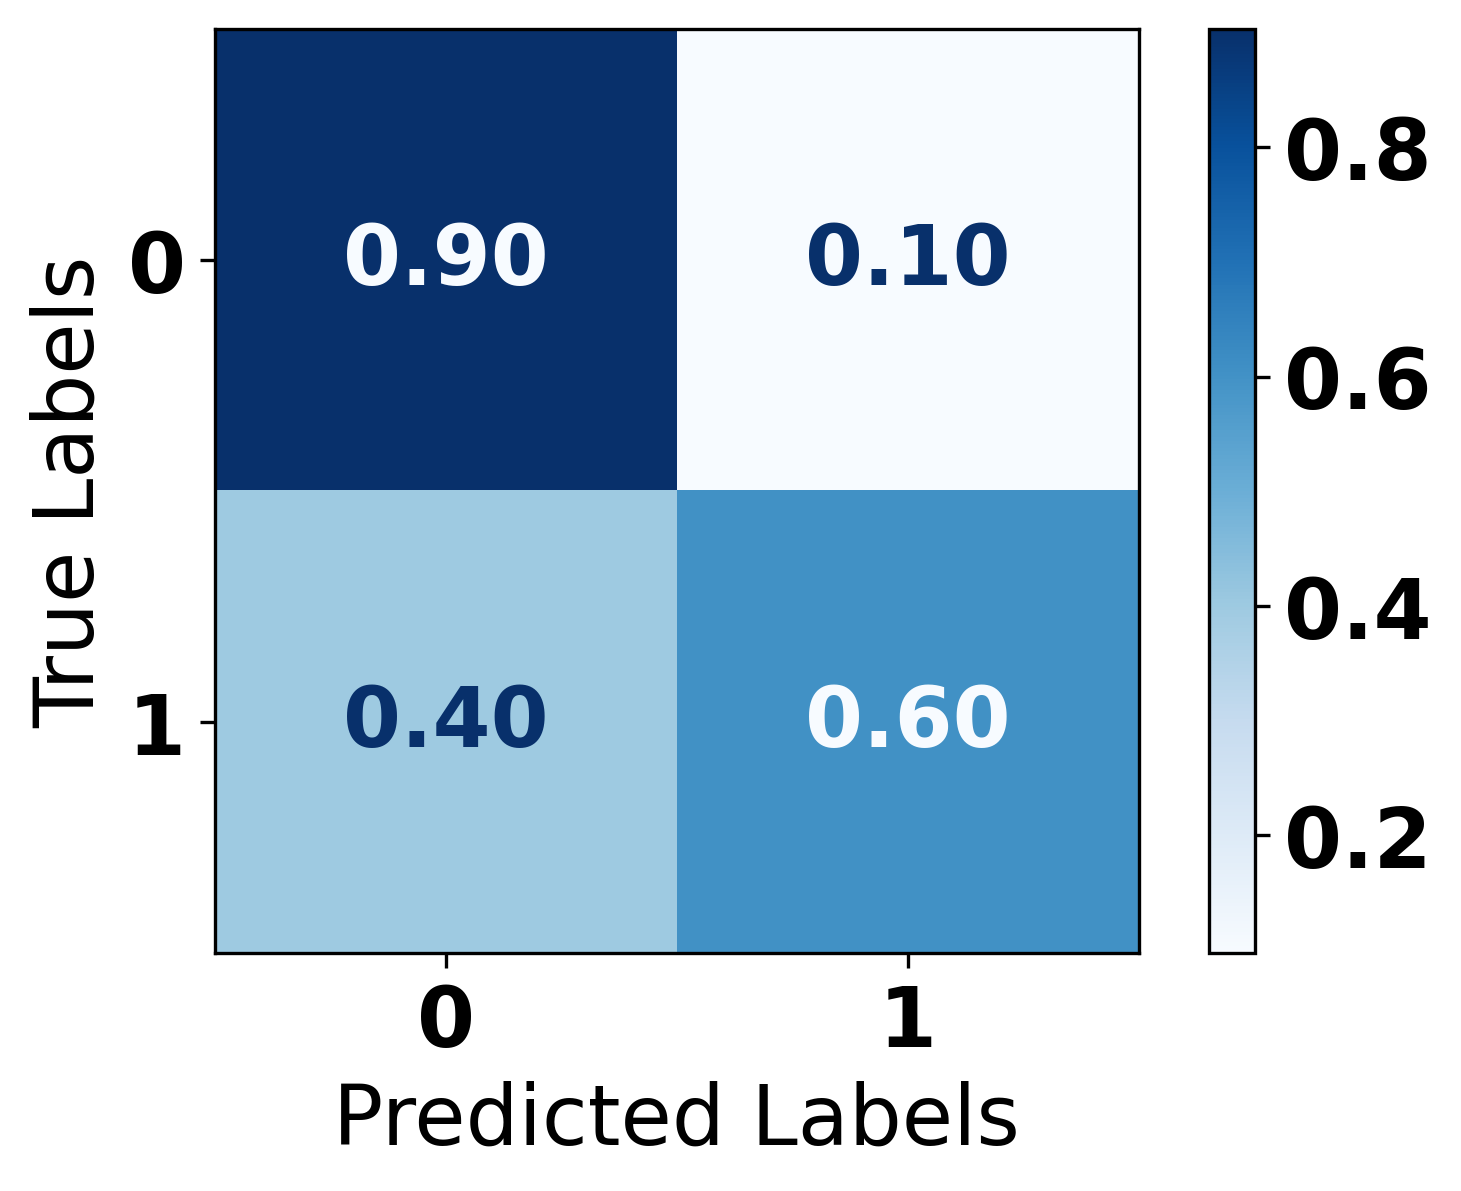

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94     11873
           1       0.20      0.60      0.30       474

    accuracy                           0.89     12347
   macro avg       0.59      0.75      0.62     12347
weighted avg       0.95      0.89      0.92     12347

Train Accuracy: 0.7569074778200253
Test Accuracy: 0.8913906212035312


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=[0.9, 0.1], var_smoothing=1e-3)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/MyDrive/Heart-Disease/Model/GNB.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/GNB.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


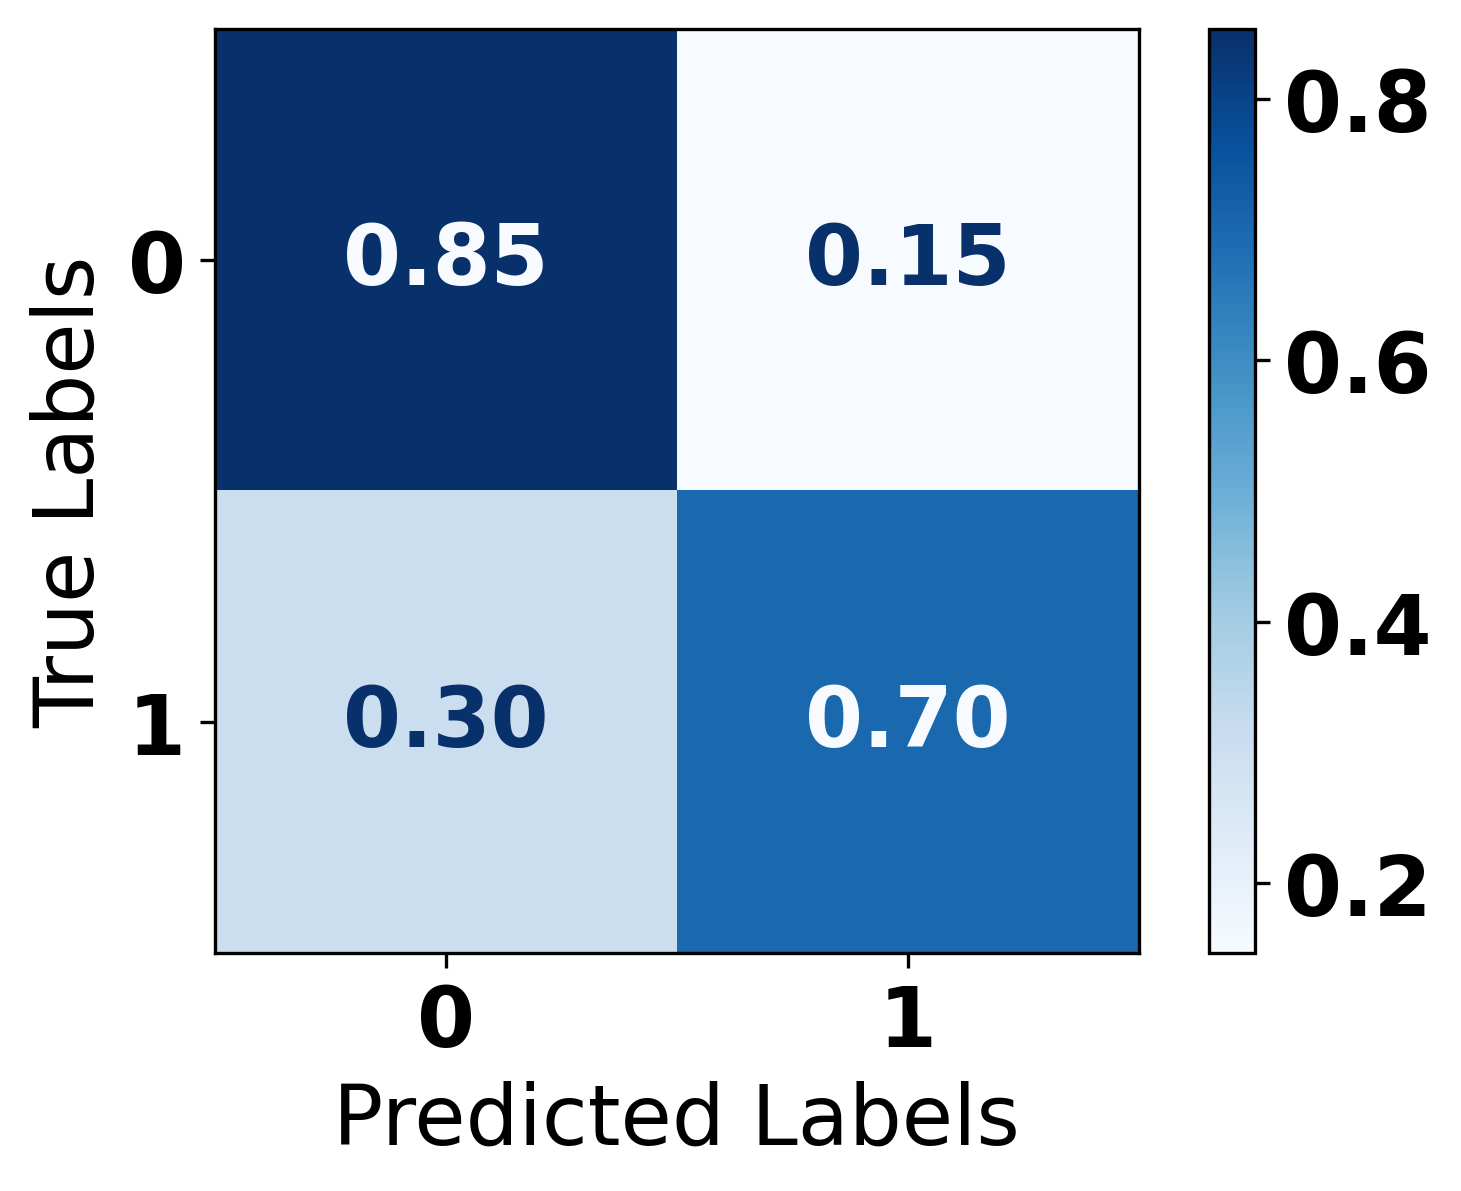

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91     11873
           1       0.16      0.70      0.26       474

    accuracy                           0.85     12347
   macro avg       0.57      0.78      0.59     12347
weighted avg       0.95      0.85      0.89     12347

Train Accuracy: 0.7947190536544149
Test Accuracy: 0.8473313355470965


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=11, learning_rate=0.2, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/MyDrive/Heart-Disease/Model/AdaBoost.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    random_state=55,
    max_iter=50,
    hidden_layer_sizes=(4,),  # Size of the hidden layers (default is a single layer with 100 neurons)
    activation='relu',          # Activation function for the hidden layer ('identity', 'logistic', 'tanh', 'relu')
    solver='adam',              # Solver for weight optimization ('lbfgs', 'sgd', 'adam')
    alpha=0.00001,               # L2 penalty (regularization term) parameter
    batch_size='auto',          # Size of minibatches for stochastic optimizers
    learning_rate='constant',   # Learning rate schedule ('constant', 'invscaling', 'adaptive')
    learning_rate_init=0.0001,   # Initial learning rate used
    power_t=0.5,                # The exponent for inverse scaling learning rate
    shuffle=True,               # Whether to shuffle samples in each iteration
    tol=1e-8,                   # Tolerance for the optimization
    verbose=False,              # Whether to print progress messages to stdout
    warm_start=False,           # Reuse the solution of the previous call to fit as initialization
    momentum=0.2,               # Momentum for gradient descent update (only used when solver='sgd')
    nesterovs_momentum=True,    # Whether to use Nesterov's momentum (only used when solver='sgd' and momentum > 0)
    early_stopping=False,       # Whether to use early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,    # The proportion of training data to set aside as validation set for early stopping
    beta_1=0.09,                 # Exponential decay rate for estimates of first moment vector in Adam
    beta_2=0.0999,               # Exponential decay rate for estimates of second moment vector in Adam
    epsilon=1e-4                # Value for numerical stability in Adam
).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.73982987 0.26017013]
 [0.26793249 0.73206751]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.74      0.85     11873
     Class 1       0.10      0.73      0.18       474

    accuracy                           0.74     12347
   macro avg       0.54      0.74      0.51     12347
weighted avg       0.95      0.74      0.82     12347



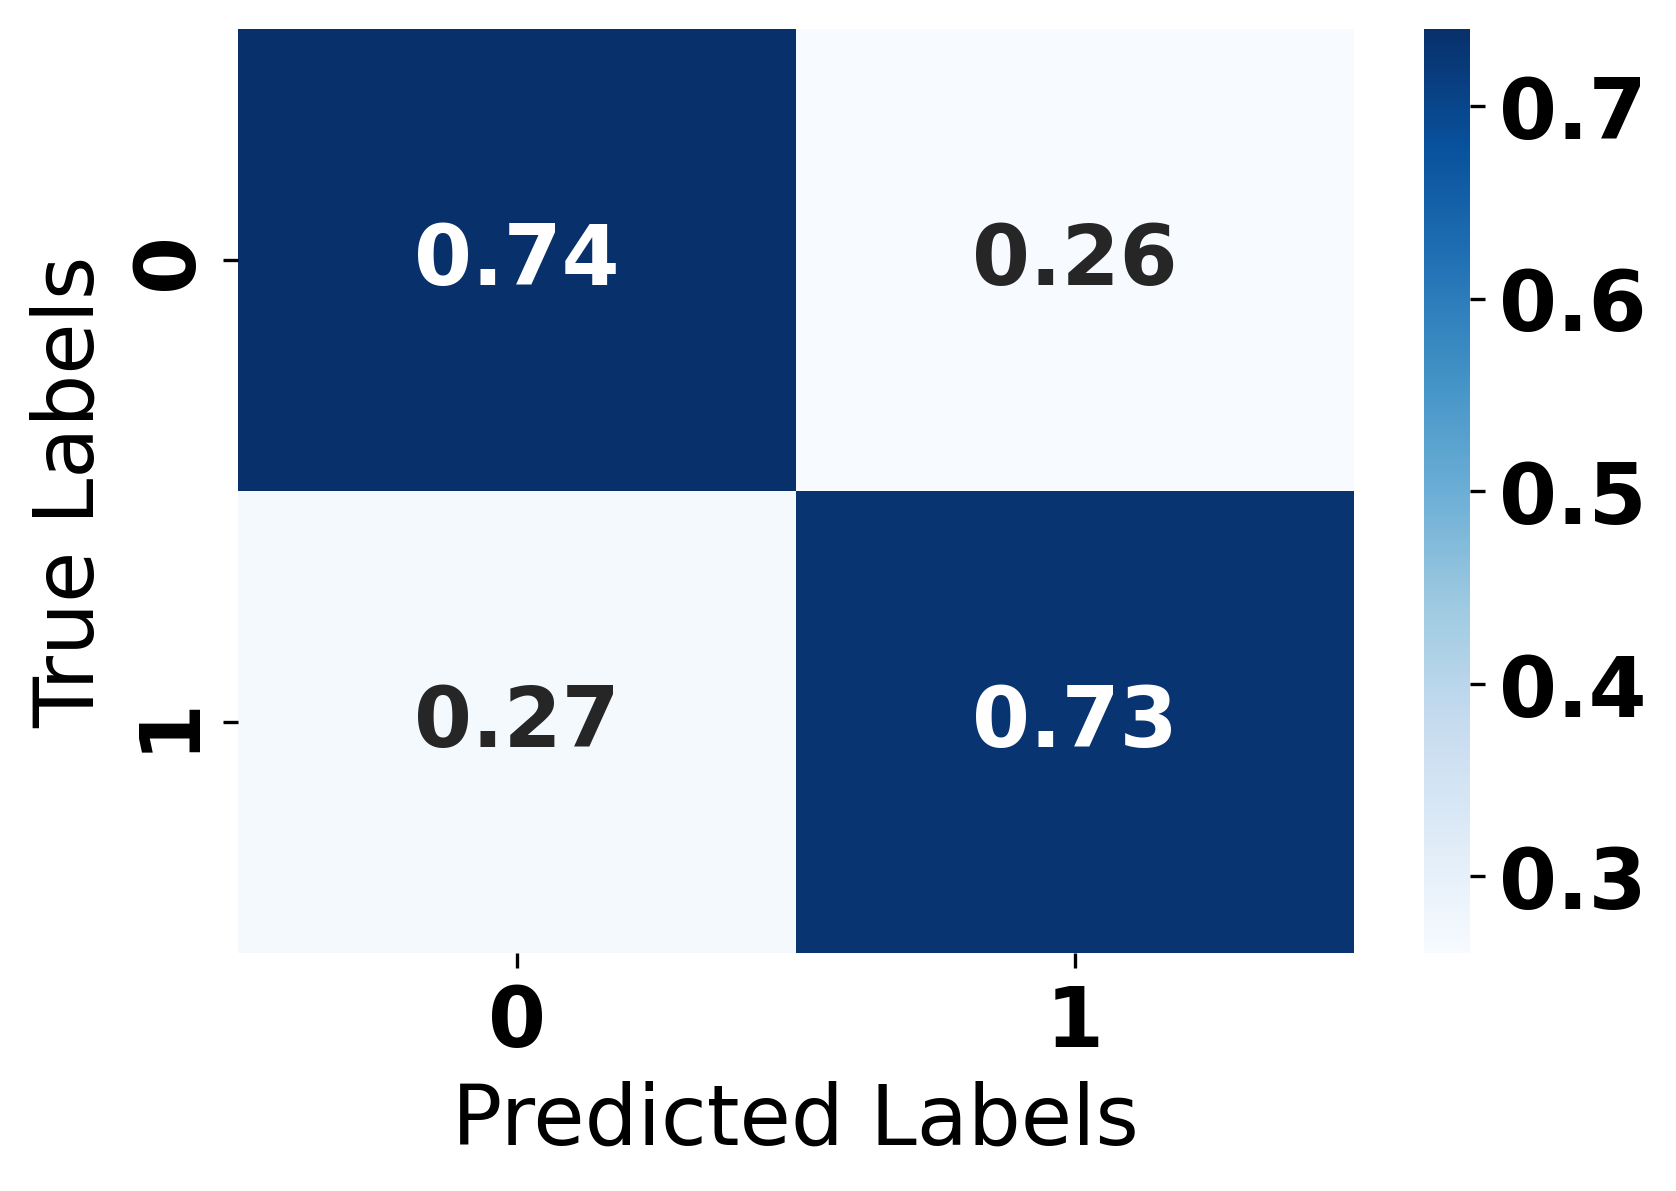

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/MyDrive/Heart-Disease/Model/MLP.pkl')
"""

['/content/drive/MyDrive/Heart-Disease/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/MyDrive/Heart-Disease/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6110 - loss: 0.6903 - val_accuracy: 0.6956 - val_loss: 0.6091
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7875 - loss: 0.4589 - val_accuracy: 0.8068 - val_loss: 0.4007
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8016 - loss: 0.4177 - val_accuracy: 0.8231 - val_loss: 0.3667
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8113 - loss: 0.4038 - val_accuracy: 0.8464 - val_loss: 0.3300
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8103 - loss: 0.4016 - val_accuracy: 0.6666 - val_loss: 0.5984
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8126 - loss: 0.4026 - val_accuracy: 0.7576 - val_loss: 0.4489
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8164 - loss: 0.3970 - val_accuracy: 0.7919 - val_loss: 0.4115
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.3953 - val_accuracy: 

386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Normalized Confusion Matrix:
[[0.87357871 0.12642129]
 [0.30379747 0.69620253]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.87      0.93     11873
     Class 1       0.18      0.70      0.29       474

    accuracy                           0.87     12347
   macro avg       0.58      0.78      0.61     12347
weighted avg       0.96      0.87      0.90     12347



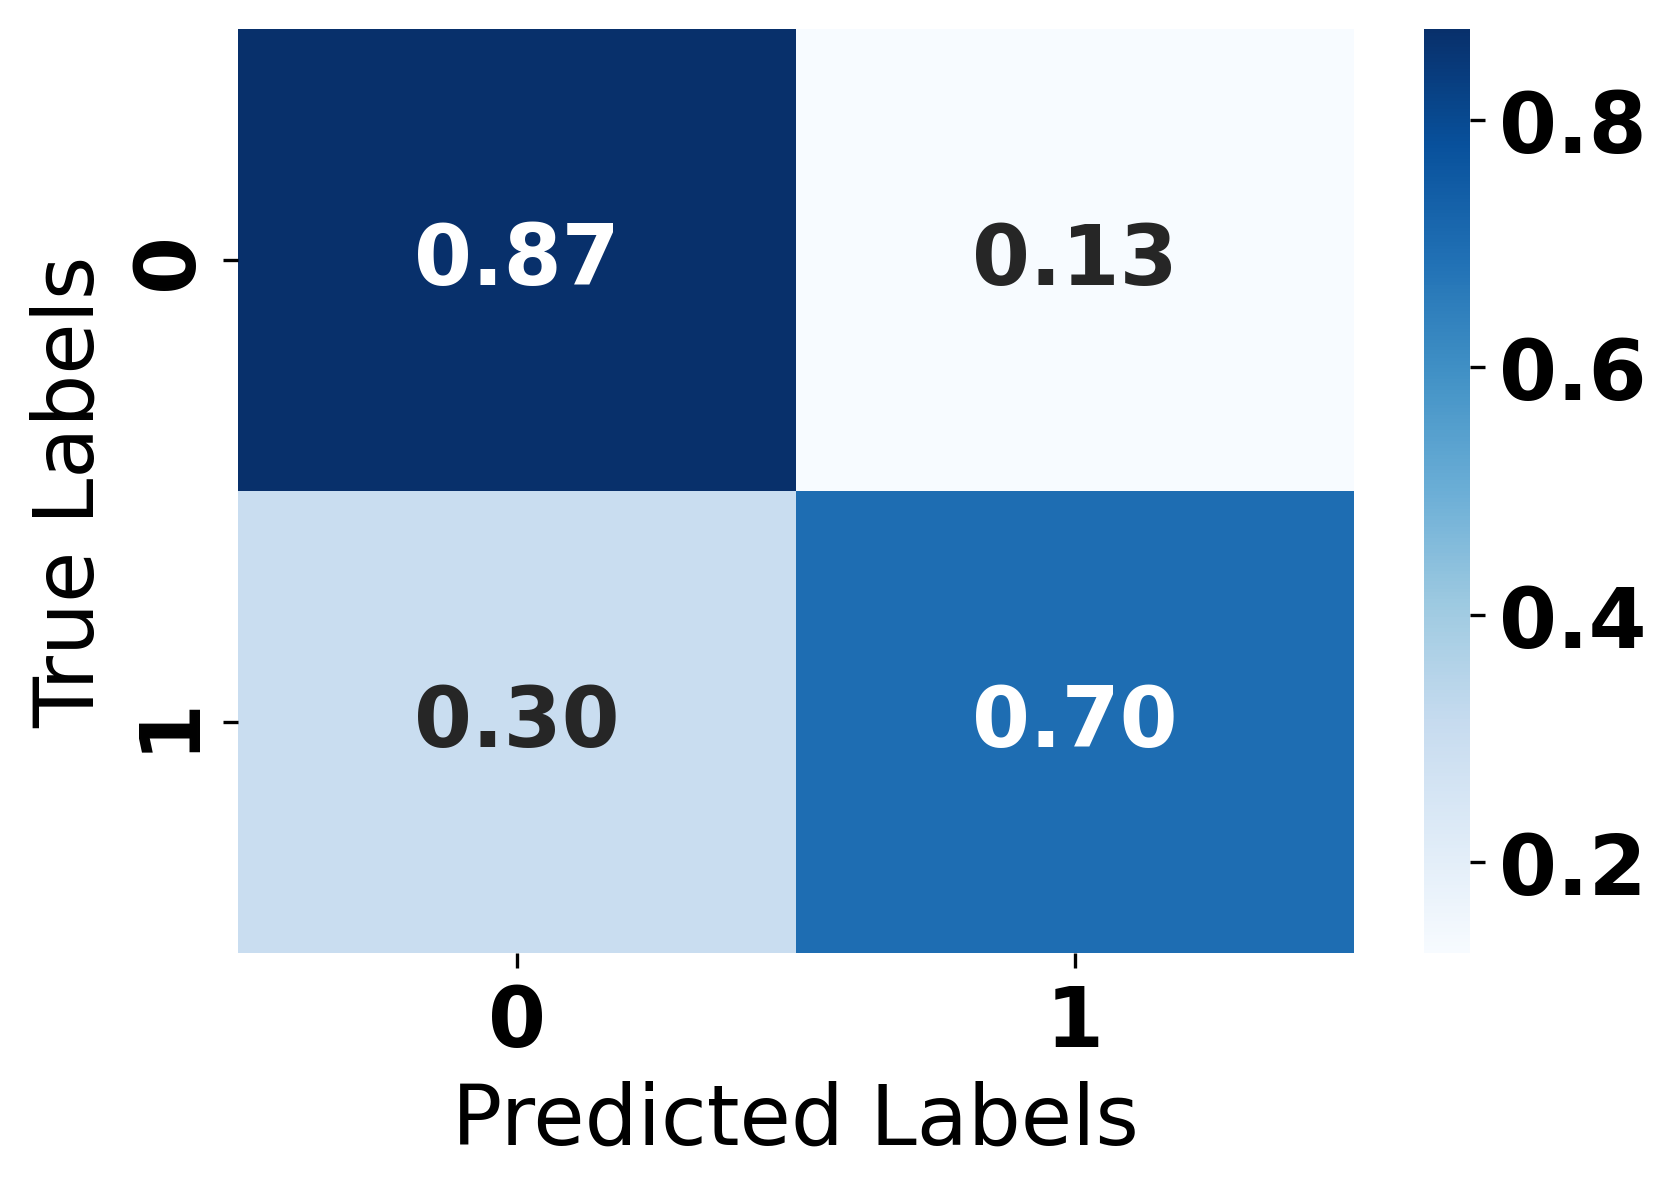

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Heart-Disease/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/MyDrive/Heart-Disease/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_even_more_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(1024, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(512, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(256, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)
    dense3 = Dropout(0.5)(dense3)

    dense4 = Dense(128, activation='relu')(dense3)
    dense4 = BatchNormalization()(dense4)
    dense4 = Dropout(0.5)(dense4)

    dense5 = Dense(64, activation='relu')(dense4)
    dense5 = BatchNormalization()(dense5)

    output = Dense(1, activation='sigmoid')(dense5)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the even more complex ANN model
even_more_complex_ann_model = create_even_more_complex_ann_model(input_shape)

# Compile the model
even_more_complex_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the even more complex ANN model
even_more_complex_ann_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the even more complex ANN model
loss, accuracy = even_more_complex_ann_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.6836 - loss: 0.6314 - val_accuracy: 0.9621 - val_loss: 0.1277
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7918 - loss: 0.4436 - val_accuracy: 0.8306 - val_loss: 0.3274
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8041 - loss: 0.4207 - val_accuracy: 0.8728 - val_loss: 0.2569
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8091 - loss: 0.4150 - val_accuracy: 0.8104 - val_loss: 0.3528
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8107 - loss: 0.4101 - val_accuracy: 0.8642 - val_loss: 0.2878
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8123 - loss: 0.4079 - val_accuracy: 0.9464 - val_loss: 0.1662
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8135 - loss: 0.4001 - val_accuracy: 0.8109 - val_loss: 0.3798
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8183 - loss: 0.3965 - val_accuracy: 

386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Normalized Confusion Matrix:
[[0.73090205 0.26909795]
 [0.17088608 0.82911392]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.73      0.84     11873
     Class 1       0.11      0.83      0.19       474

    accuracy                           0.73     12347
   macro avg       0.55      0.78      0.52     12347
weighted avg       0.96      0.73      0.82     12347



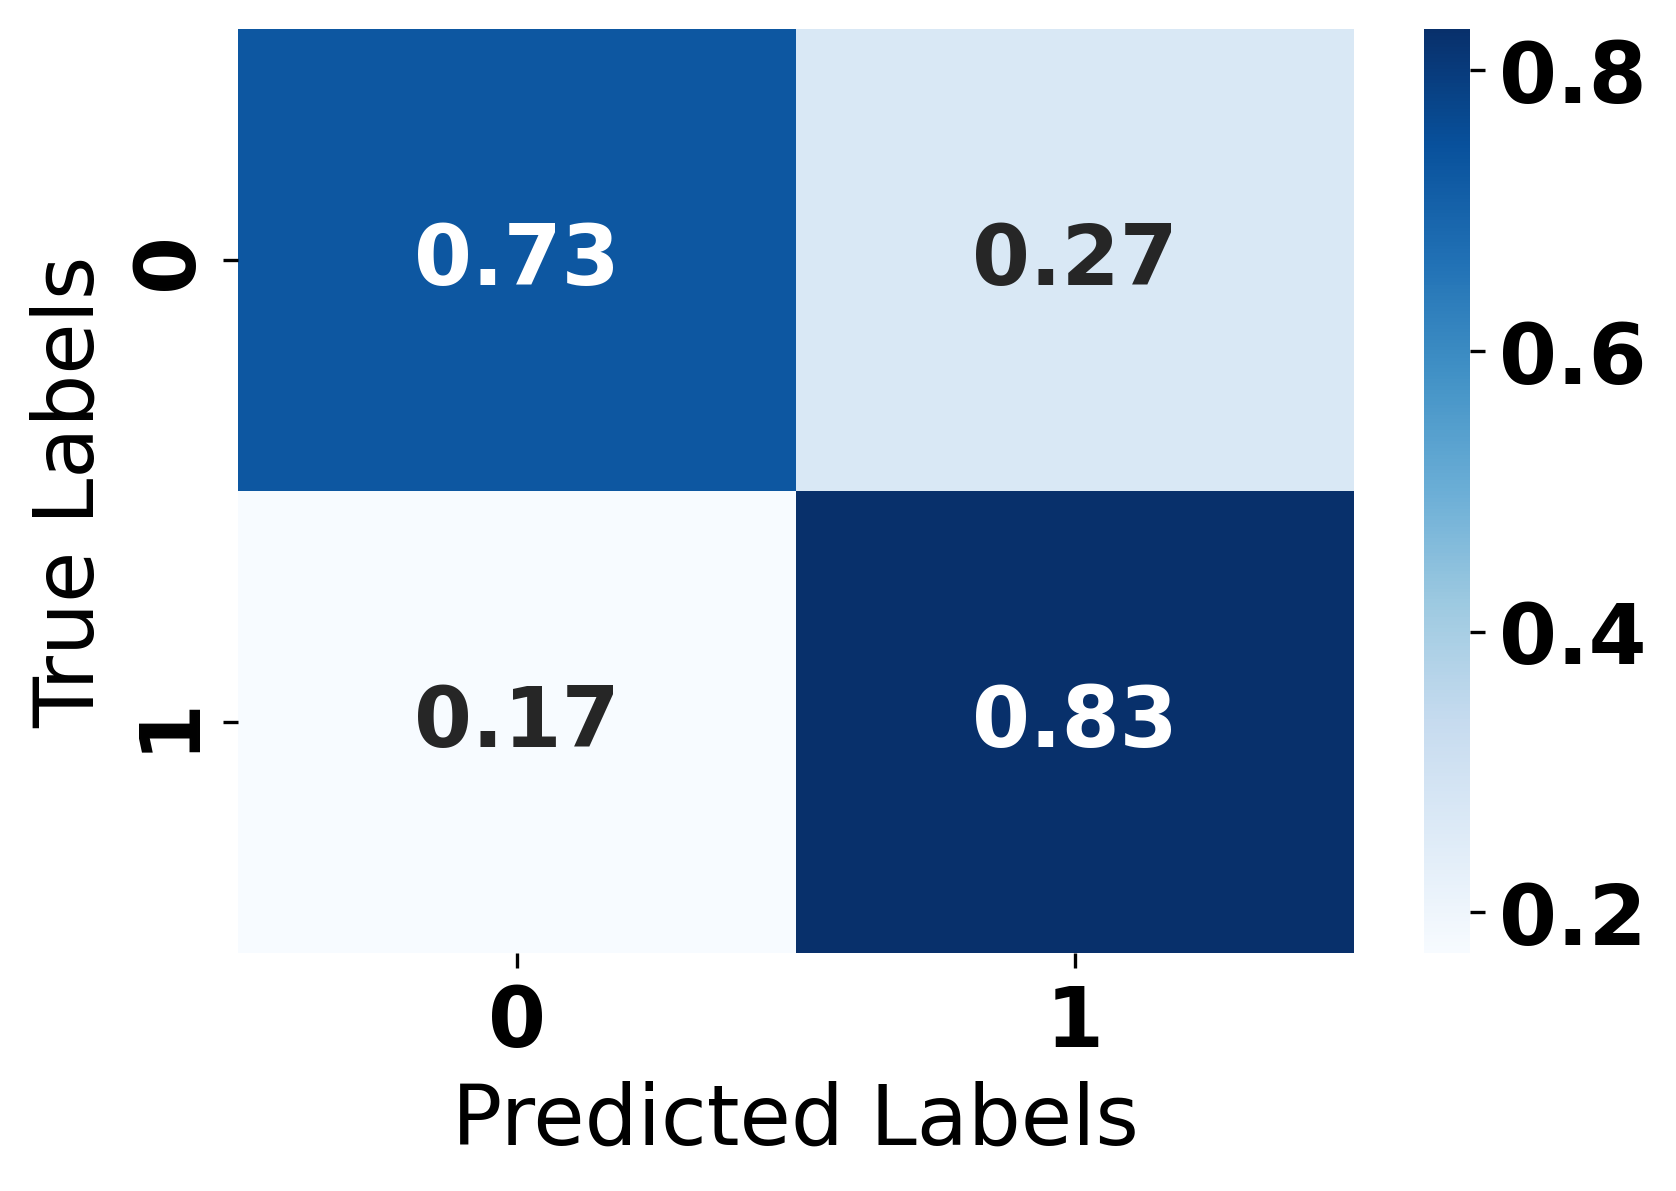

In [ ]:
# Predict probabilities on test data
y_pred_prob = even_more_complex_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.58
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.58)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
even_more_complex_ann_model.save('/content/drive/MyDrive/Heart-Disease/Model/ANN(Base).h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN_Base = load_model('/content/drive/MyDrive/Heart-Disease/Model/ANN(Base).h5')

In [ ]:
from tensorflow.keras.layers import Layer, Dense, BatchNormalization, Dropout, Input, Concatenate
from tensorflow.keras.models import Model
import tensorflow as tf

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

class GrowLayer(Layer):
    def __init__(self, units, activation='relu', **kwargs):
        super(GrowLayer, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.dense_layer = Dense(self.units, activation=self.activation)
        super(GrowLayer, self).build(input_shape)

    def call(self, inputs):
        return self.dense_layer(inputs)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

def create_grownet_tabular_model(input_shape, initial_units=256, growth_factor=2):
    input_layer = Input(shape=input_shape)
    current_units = initial_units

    # Initial dense layer
    dense = GrowLayer(current_units)(input_layer)
    dense = BatchNormalization()(dense)
    dense = Dropout(0.5)(dense)

    # Additional GrowNet layers
    for _ in range(2):  # You can adjust the number of additional layers
        current_units *= growth_factor
        grow_layer = GrowLayer(current_units)(input_layer)
        dense = Concatenate()([dense, grow_layer])
        dense = BatchNormalization()(dense)
        dense = Dropout(0.5)(dense)

    output = Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the GrowNet tabular model
grownet_tabular_model = create_grownet_tabular_model(input_shape)

# Compile the model
grownet_tabular_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the GrowNet tabular model
grownet_tabular_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the GrowNet tabular model
loss, accuracy = grownet_tabular_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7532 - loss: 0.5408 - val_accuracy: 0.9326 - val_loss: 0.2191
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7932 - loss: 0.4452 - val_accuracy: 0.9463 - val_loss: 0.1621
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8022 - loss: 0.4327 - val_accuracy: 0.8885 - val_loss: 0.2750
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8040 - loss: 0.4208 - val_accuracy: 0.8503 - val_loss: 0.3528
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8050 - loss: 0.4151 - val_accuracy: 0.8888 - val_loss: 0.2827
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8031 - loss: 0.4229 - val_accuracy: 0.7754 - val_loss: 0.4930
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8018 - loss: 0.4256 - val_accuracy: 0.8882 - val_loss: 0.2836
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8071 - loss: 0.4155 - val_accuracy: 

850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Normalized Confusion Matrix:
[[0.79866693 0.20133307]
 [0.17495506 0.82504494]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.80      0.88     25505
     Class 1       0.21      0.83      0.34      1669

    accuracy                           0.80     27174
   macro avg       0.60      0.81      0.61     27174
weighted avg       0.94      0.80      0.85     27174



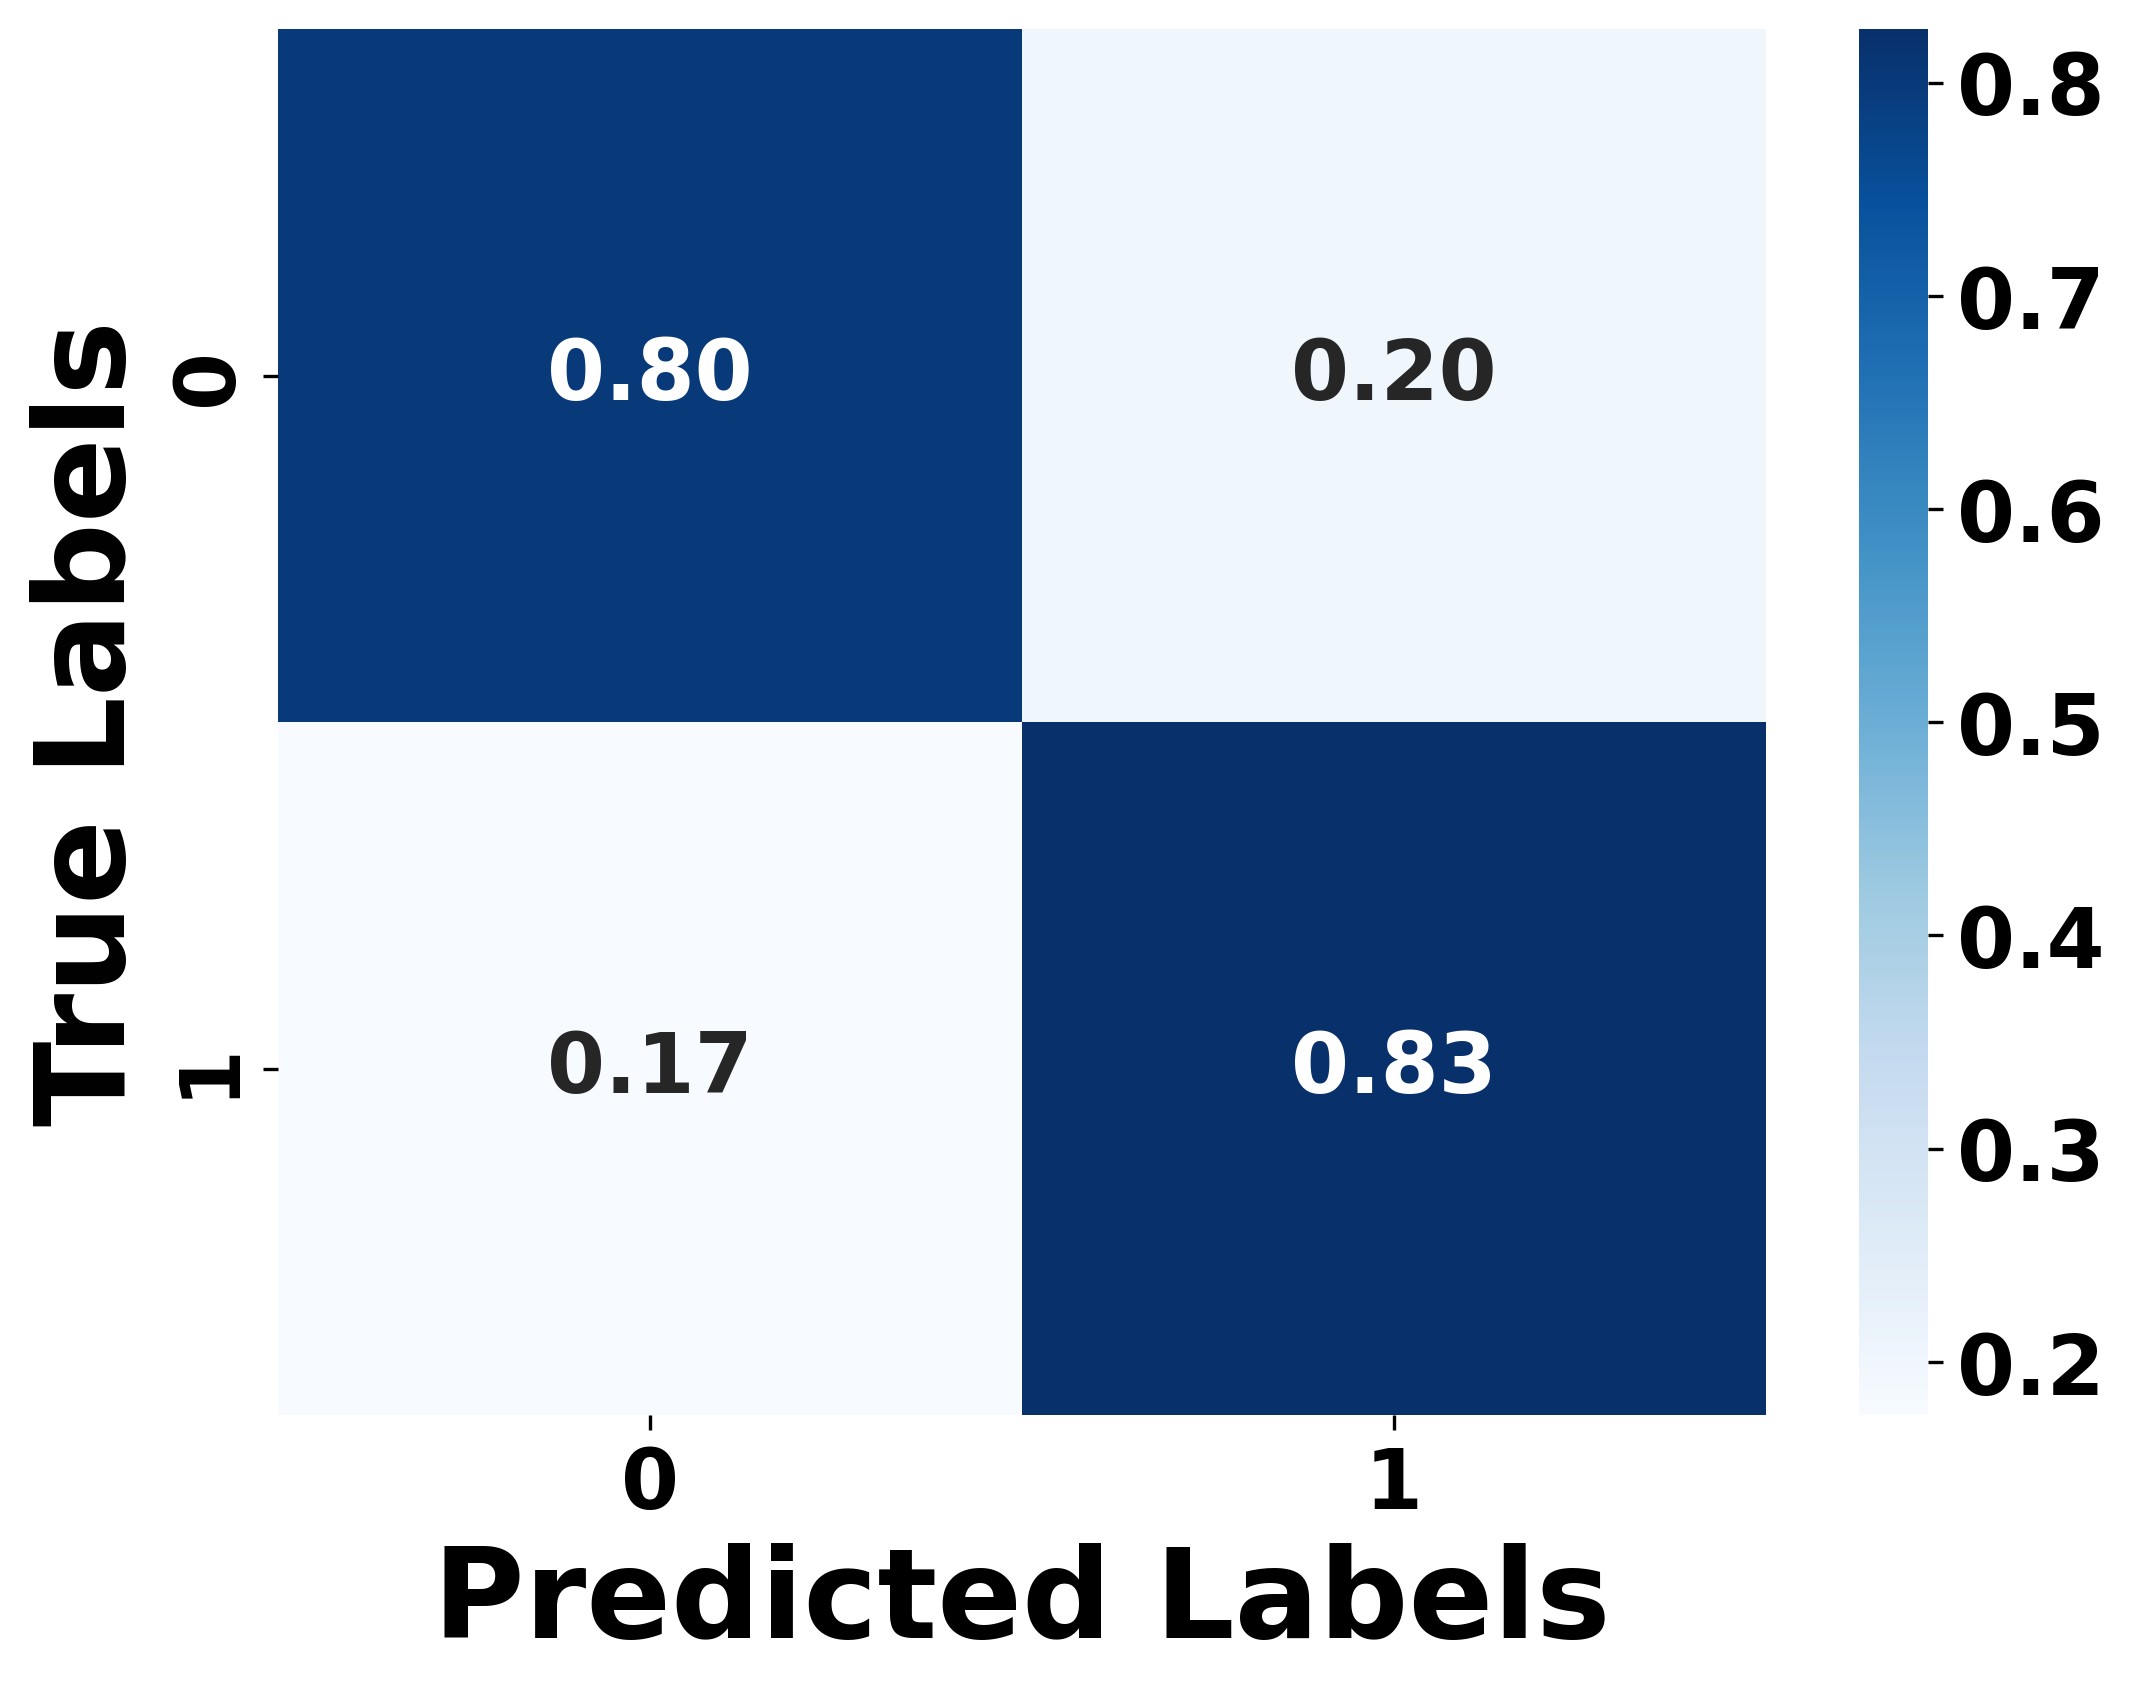

In [ ]:
# Predict probabilities on test data
y_pred_prob = grownet_tabular_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=30, weight='bold')
plt.xlabel('Predicted Labels', fontsize=30, weight='bold')
plt.ylabel('True Labels', fontsize=30, weight='bold')
plt.show()

In [ ]:
"""
# Save the model to a file
grownet_tabular_model.save('/content/drive/MyDrive/Heart-Disease/Model/GrowNet(updated).h5')
"""

In [ ]:
# Print model summary
grownet_tabular_model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 24)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ grow_layer_51 (GrowLayer) │ (None, 256)            │          6,400 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_56    │ (None, 256)            │          1,024 │ grow_layer_51[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_55 (Dropout)      │ (None, 256)            │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ grow_layer_52 (GrowLayer) │ (None, 512)            │         12,800 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_34            │ (None, 768)            │              0 │ dropout_55[0][0],      │
│ (Concatenate)             │                        │                │ grow_layer_52[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 768)            │          3,072 │ concatenate_34[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_56 (Dropout)      │ (None, 768)            │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ grow_layer_53 (GrowLayer) │ (None, 1024)           │         25,600 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_35            │ (None, 1792)           │              0 │ dropout_56[0][0],      │
│ (Concatenate)             │                        │                │ grow_layer_53[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_58    │ (None, 1792)           │          7,168 │ concatenate_35[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_57 (Dropout)      │ (None, 1792)           │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_113 (Dense)         │ (None, 1)              │          1,793 │ dropout_57[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 162,309 (634.02 KB)

 Trainable params: 52,225 (204.00 KB)

 Non-trainable params: 5,632 (22.00 KB)

 Optimizer params: 104,452 (408.02 KB)

In [ ]:
# Print model summary
grownet_tabular_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 24)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ grow_layer (GrowLayer)    │ (None, 256)            │          6,400 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256)            │          1,024 │ grow_layer[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ grow_layer_1 (GrowLayer)  │ (None, 512)            │         12,800 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 768)            │              0 │ dropout[0][0],         │
│                           │                        │                │ grow_layer_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 768)            │          3,072 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 768)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ grow_layer_2 (GrowLayer)  │ (None, 1024)           │         25,600 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1792)           │              0 │ dropout_1[0][0],       │
│ (Concatenate)             │                        │                │ grow_layer_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 1792)           │          7,168 │ concatenate_1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 1792)           │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │          1,793 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 162,309 (634.02 KB)

 Trainable params: 52,225 (204.00 KB)

 Non-trainable params: 5,632 (22.00 KB)

 Optimizer params: 104,452 (408.02 KB)

# 2021

In [ ]:
# Importing Dataset
NHIS2021 = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/adult21.csv')

In [ ]:
NHIS2021 = NHIS2021[["MARITAL_A", "HOUTENURE_A", "AFVET_A", "HEIGHTTC_A", "HISPALLP_A", "SEX_A", "PCNTLT18TC", "MAXEDUCP_A", "RATCAT_A", "COPDEV_A", "CHDEV_A", "DEPEV_A", "DIBEV_A", "ARTHEV_A", "STREV_A", "ASEV_A", "CHLEV_A", "HYPEV_A", "PHSTAT_A", "BMICAT_A", "VISIONDF_A", "DIFF_A", "SOCERRNDS_A", "SHTFLU12M_A", "MIEV_A"]]

In [ ]:
# Count the total number of rows with missing values
total_rows_with_missing = NHIS2021.isnull().any(axis=1).sum()

print(f'Total rows with missing values: {total_rows_with_missing}')

Total rows with missing values: 85


In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
}

# Initialize a variable to count the number of rows with refuse values
rows_with_refuse_values = 0

# Iterate through columns and count rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2021.columns:
        rows_with_refuse_values += len(NHIS2021[NHIS2021[column].isin(refuse)])

# For columns without specified refuse values, count rows with refuse values
for column in NHIS2021.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        rows_with_refuse_values += len(NHIS2021[NHIS2021[column].isin(refuse)])

# Print the total number of rows with refuse values
print(f'Total number of rows with refuse values: {rows_with_refuse_values}')

Total number of rows with refuse values: 5019


In [ ]:
# Droping all null values
NHIS2021 = NHIS2021.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
    'DRKSTAT_A': [],  # No refuse values specified for this column
    'FRJUICNO_A': [997, 998, 999],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2021.columns:
        NHIS2021 = NHIS2021[~NHIS2021[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in NHIS2021.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        NHIS2021 = NHIS2021[~NHIS2021[column].isin(refuse)]

In [ ]:
# Dataset size (row, column)
NHIS2021.shape

(27174, 25)

In [ ]:
NHIS2021.isnull().sum()

,0
MARITAL_A,0
HOUTENURE_A,0
AFVET_A,0
HEIGHTTC_A,0
HISPALLP_A,0
SEX_A,0
PCNTLT18TC,0
MAXEDUCP_A,0
RATCAT_A,0
COPDEV_A,0


In [ ]:
# Target label class count
unique_classes = NHIS2021['CHDEV_A'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = NHIS2021['CHDEV_A'].value_counts()

print(class_counts)

CHDEV_A
2    25505
1     1669
Name: count, dtype: int64


In [ ]:
# Separating data
Healthy = NHIS2021[NHIS2021['CHDEV_A']==2]
Affected = NHIS2021[NHIS2021['CHDEV_A']==1]

In [ ]:
# Labeling

x_test = NHIS2021.drop(['CHDEV_A'], axis=1) # Input features
y_test = NHIS2021['CHDEV_A'] # Target label

In [ ]:
# Taget Label Encoder

y_test = np.array([1 if val == 1 else 0 for val in y_test])

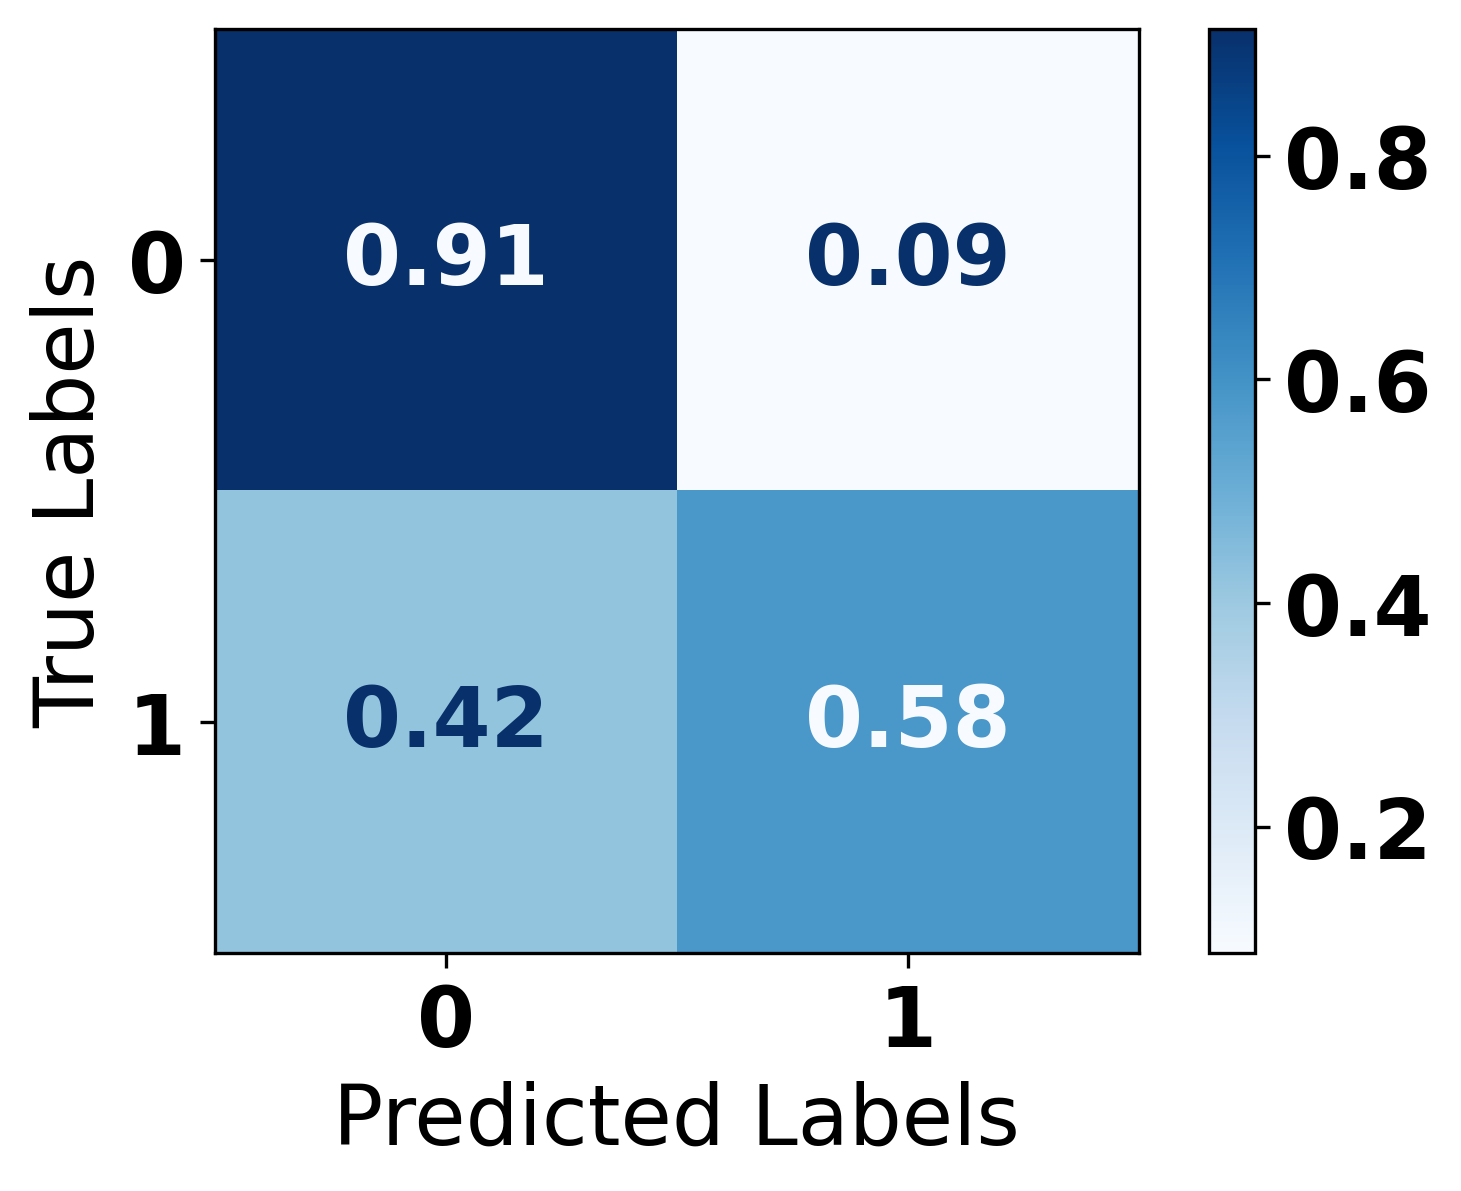

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.91      0.94     25505
     Class 1       0.31      0.58      0.40      1669

    accuracy                           0.89     27174
   macro avg       0.64      0.75      0.67     27174
weighted avg       0.93      0.89      0.91     27174

Train Accuracy: 0.9647655259822561
Test Accuracy: 0.8928755427982631


In [ ]:
# Predict on the test set
y_pred = catboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = catboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

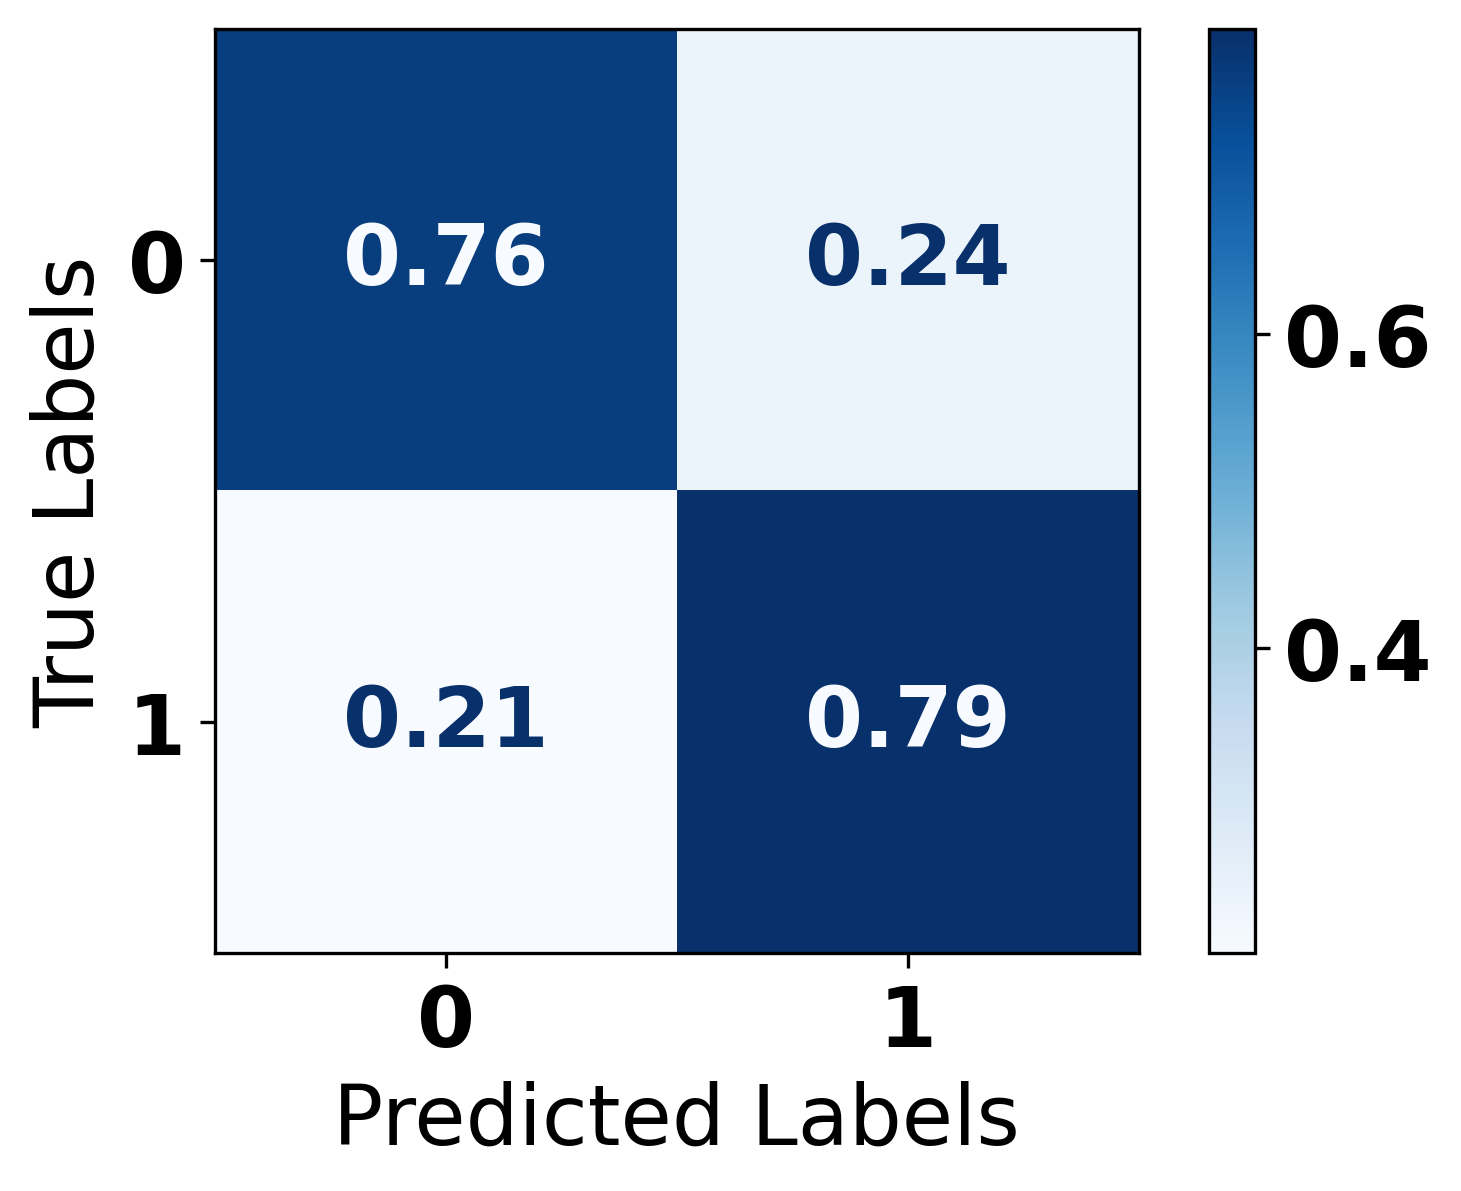

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.76      0.86     25505
     Class 1       0.18      0.79      0.29      1669

    accuracy                           0.76     27174
   macro avg       0.58      0.78      0.58     27174
weighted avg       0.93      0.76      0.82     27174

Train Accuracy: 0.7846218842416561
Test Accuracy: 0.7638551556635019


In [ ]:
# Predict on the test set
y_pred = lgbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = lgbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

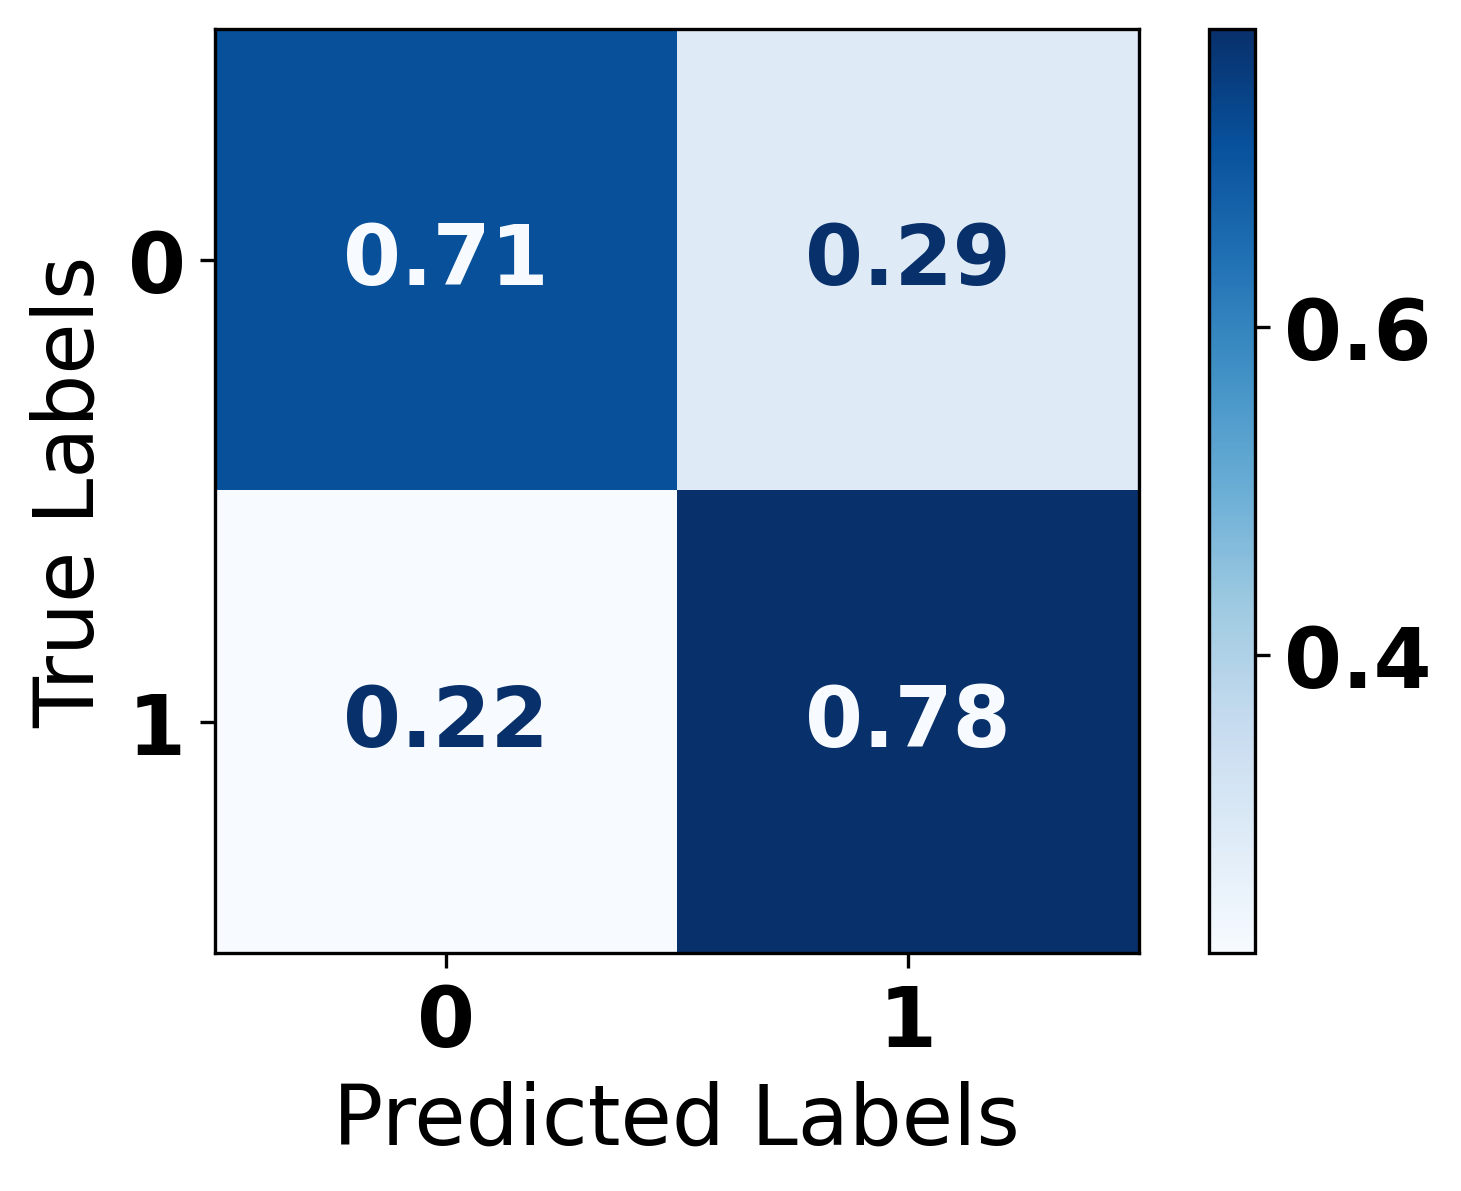

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.71      0.83     25505
     Class 1       0.15      0.78      0.25      1669

    accuracy                           0.72     27174
   macro avg       0.57      0.75      0.54     27174
weighted avg       0.93      0.72      0.79     27174

Train Accuracy: 0.7440642163075624
Test Accuracy: 0.7173401045116655


In [ ]:
# Predict on the test set
y_pred = gbm.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = gbm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

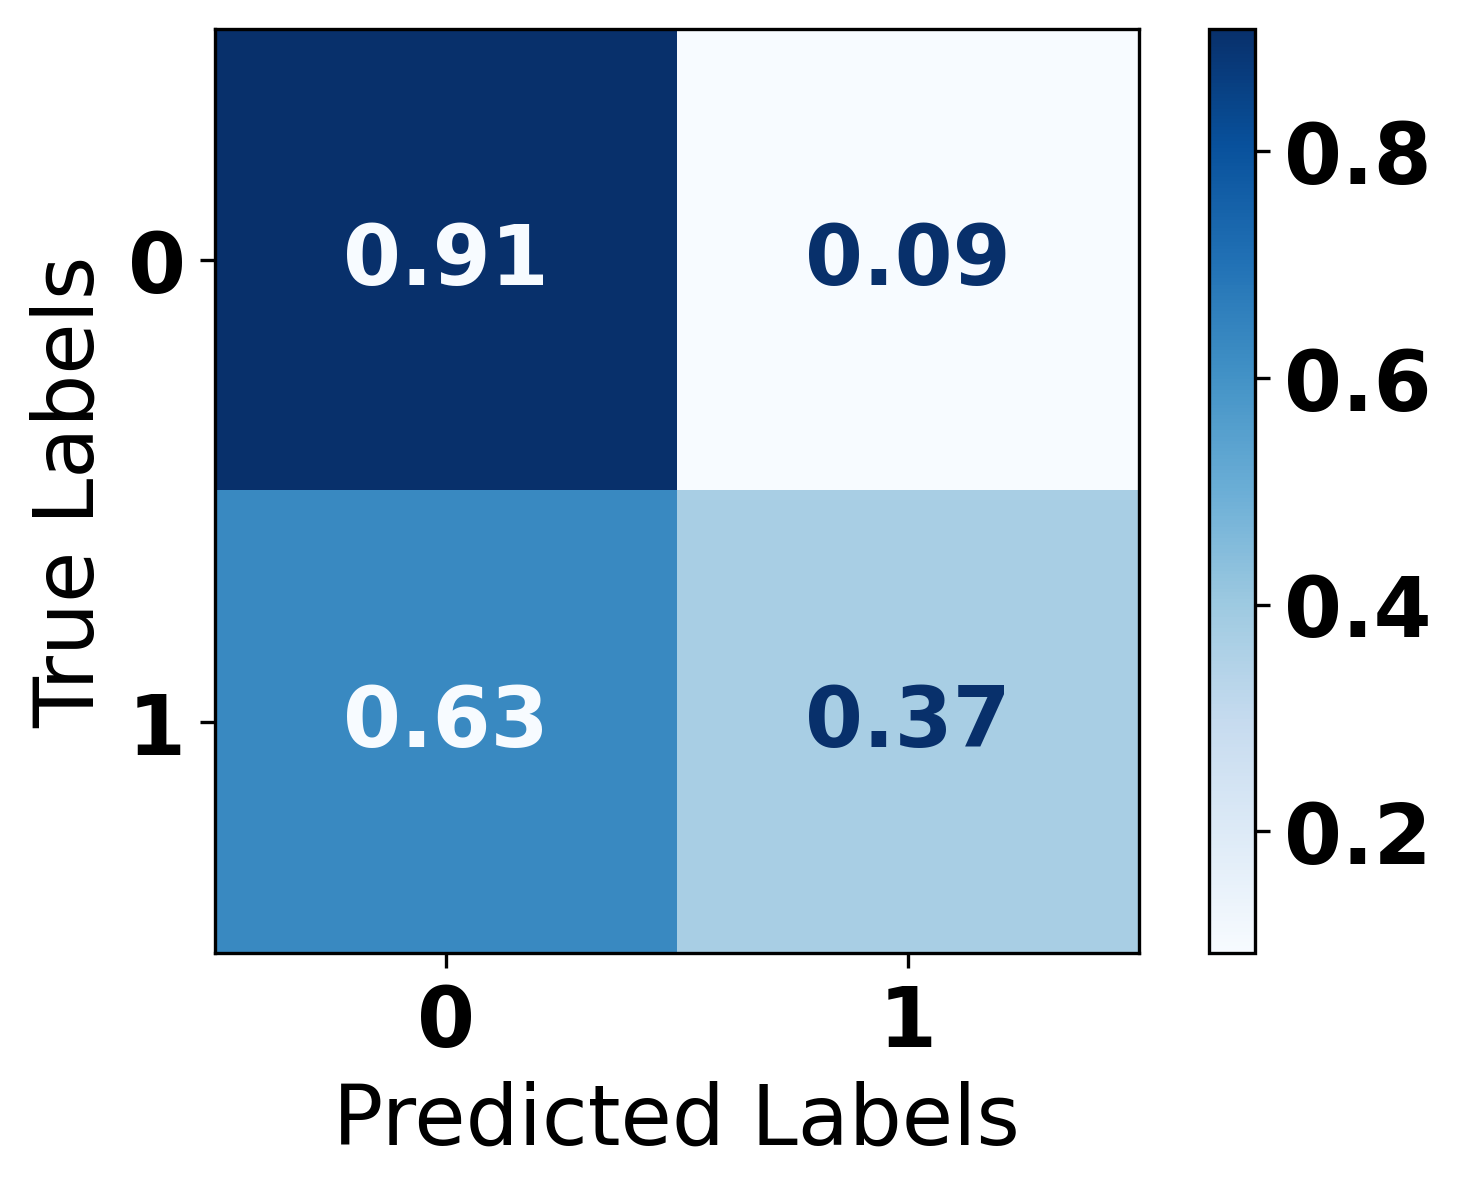

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.91      0.93     25505
     Class 1       0.21      0.37      0.27      1669

    accuracy                           0.87     27174
   macro avg       0.58      0.64      0.60     27174
weighted avg       0.91      0.87      0.89     27174

Train Accuracy: 0.9660752006759611
Test Accuracy: 0.8744388017958342


In [ ]:
# Predict on the test set
y_pred = knn.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = knn.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

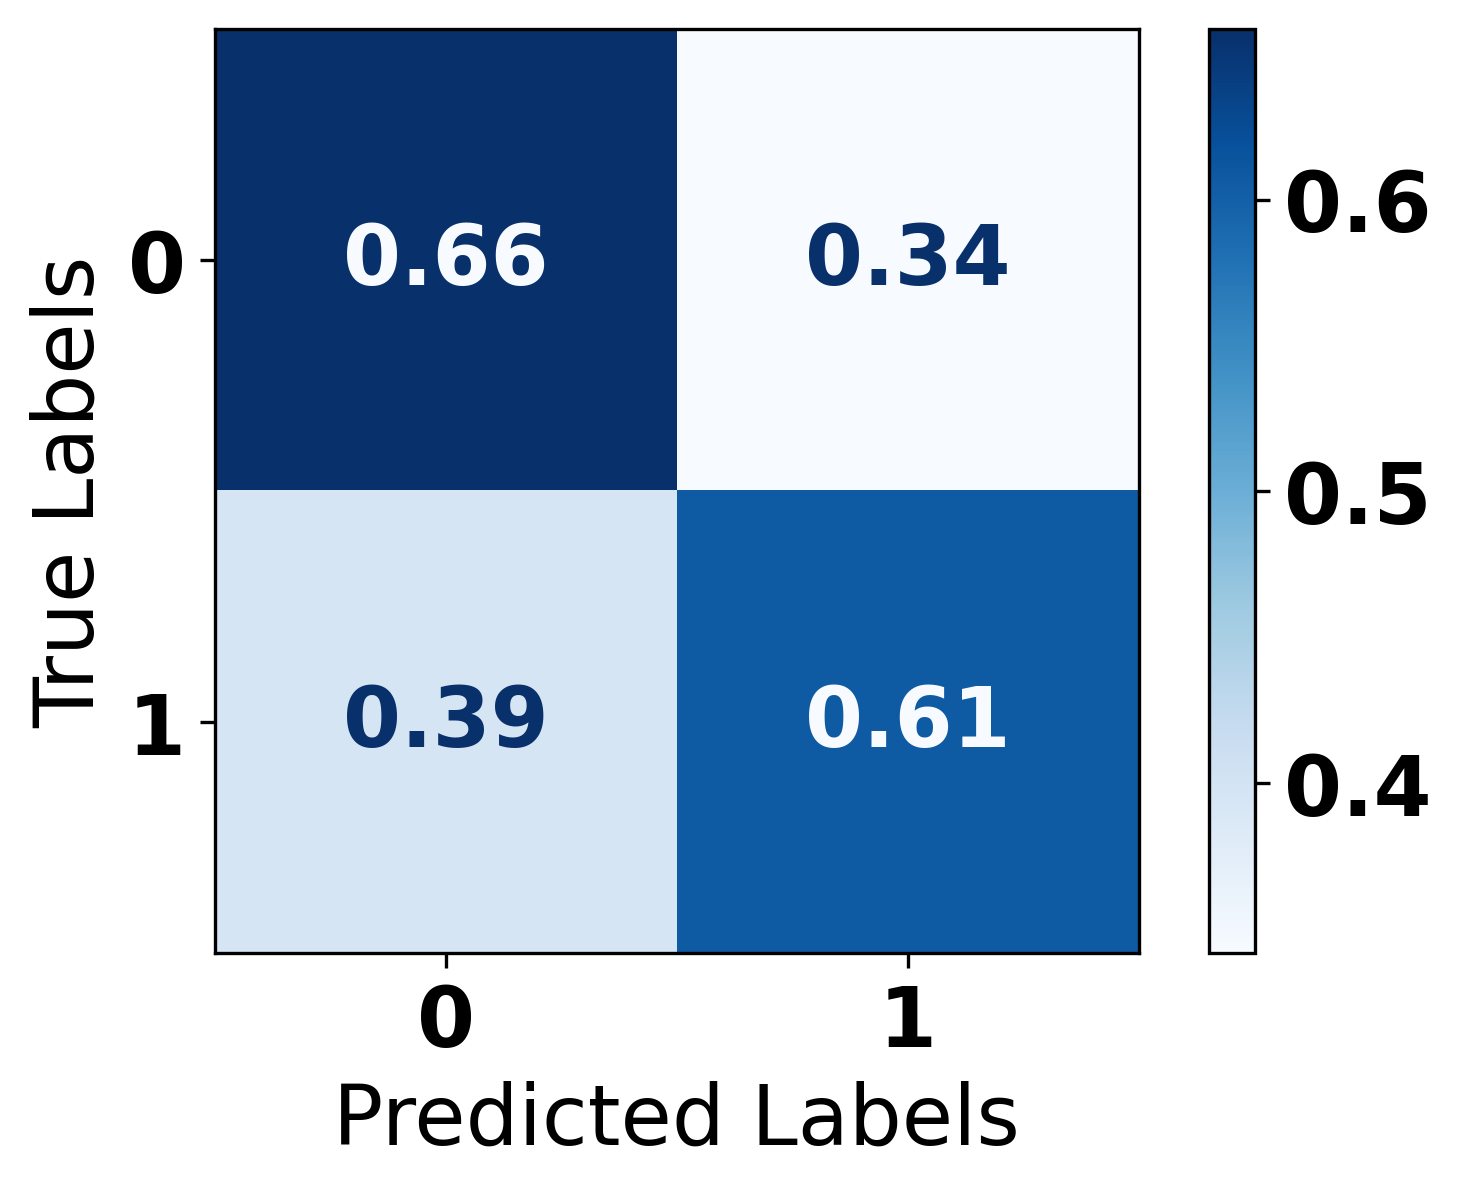

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.66      0.78     25505
     Class 1       0.10      0.61      0.18      1669

    accuracy                           0.66     27174
   macro avg       0.53      0.63      0.48     27174
weighted avg       0.91      0.66      0.74     27174

Train Accuracy: 0.6175327418673426
Test Accuracy: 0.6552219032899095


In [ ]:
# Predict on the test set
y_pred = log_reg.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = log_reg.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

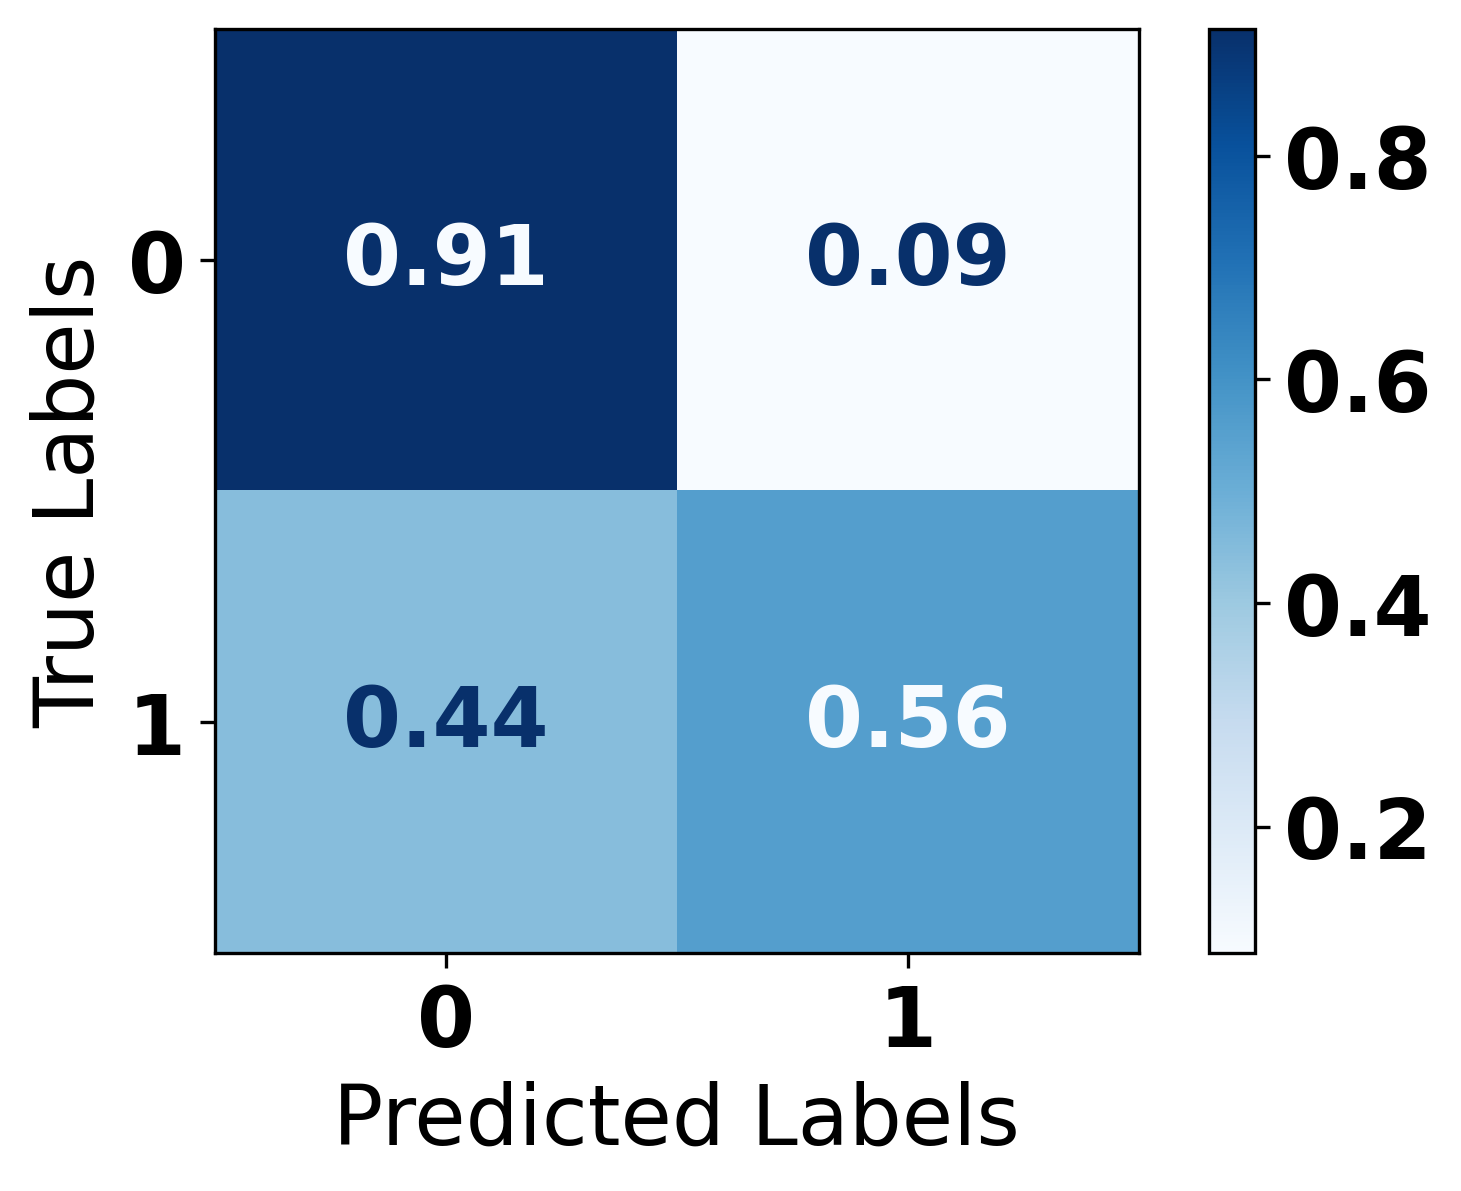

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.91      0.94     25505
     Class 1       0.30      0.56      0.39      1669

    accuracy                           0.89     27174
   macro avg       0.63      0.73      0.66     27174
weighted avg       0.93      0.89      0.91     27174

Train Accuracy: 0.9645542881284326
Test Accuracy: 0.8912931478619268


In [ ]:
# Predict on the test set
y_pred = XGB.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = XGB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

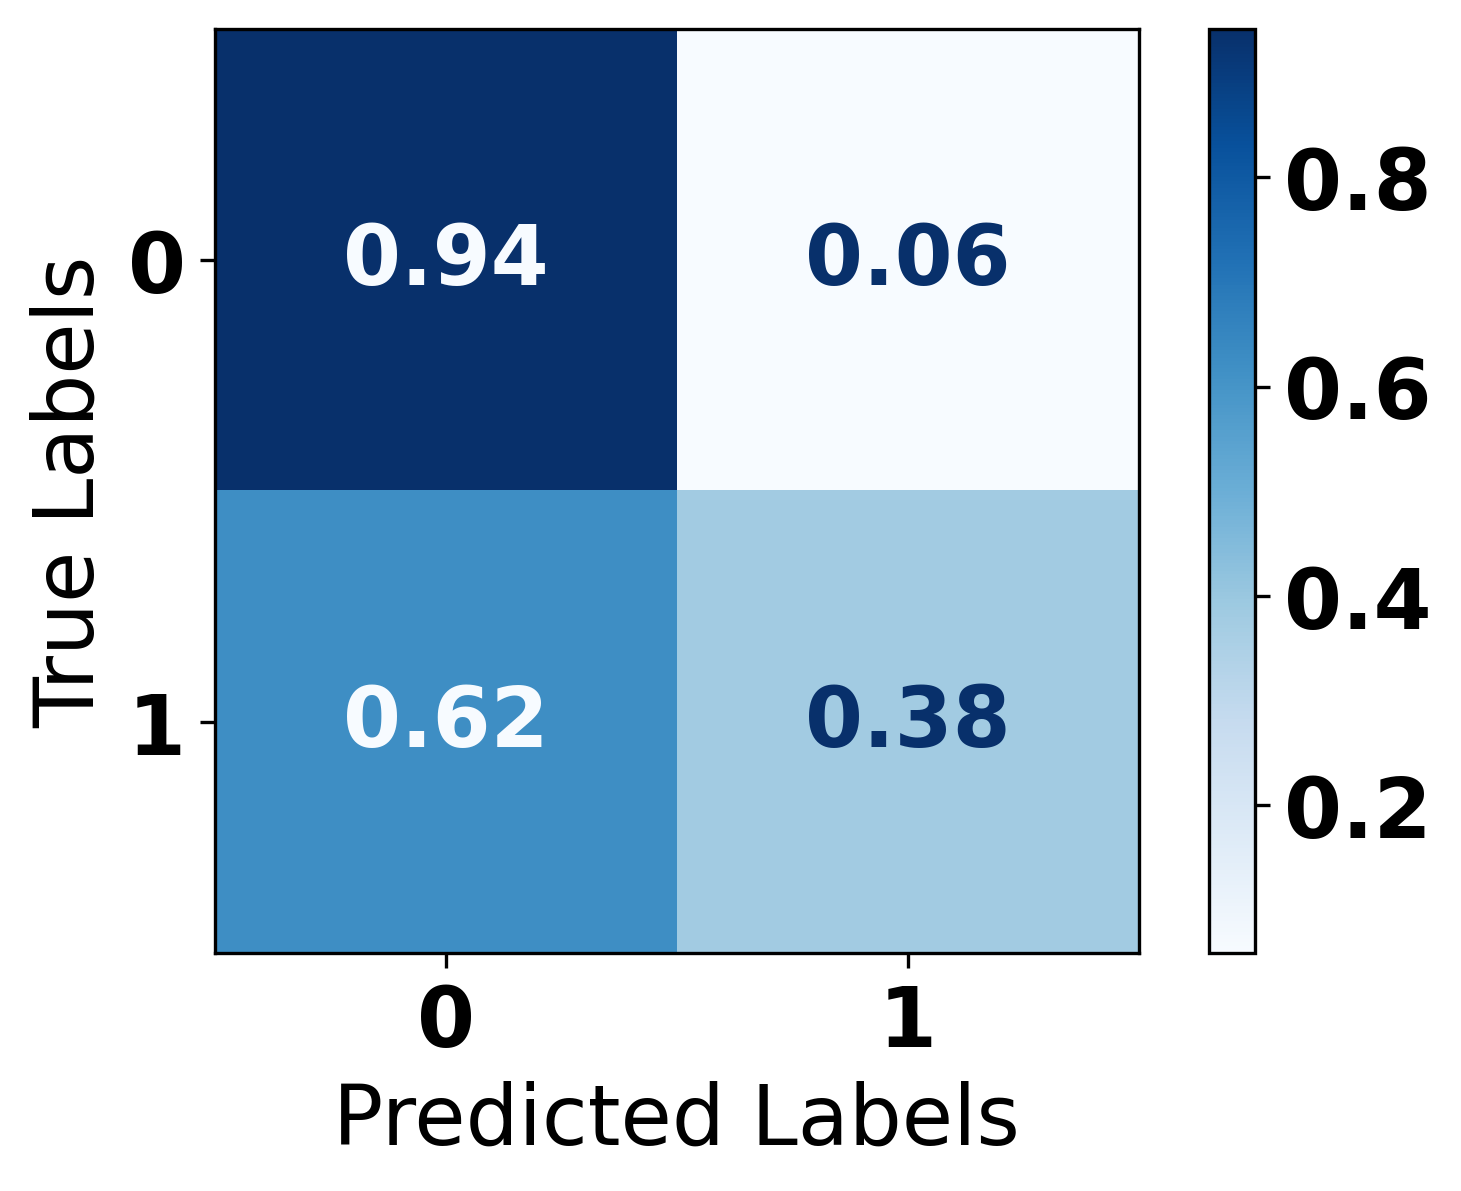

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.94      0.95     25505
     Class 1       0.30      0.38      0.33      1669

    accuracy                           0.91     27174
   macro avg       0.63      0.66      0.64     27174
weighted avg       0.92      0.91      0.91     27174

Train Accuracy: 0.9995775242923531
Test Accuracy: 0.9070802973430485


In [ ]:
# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

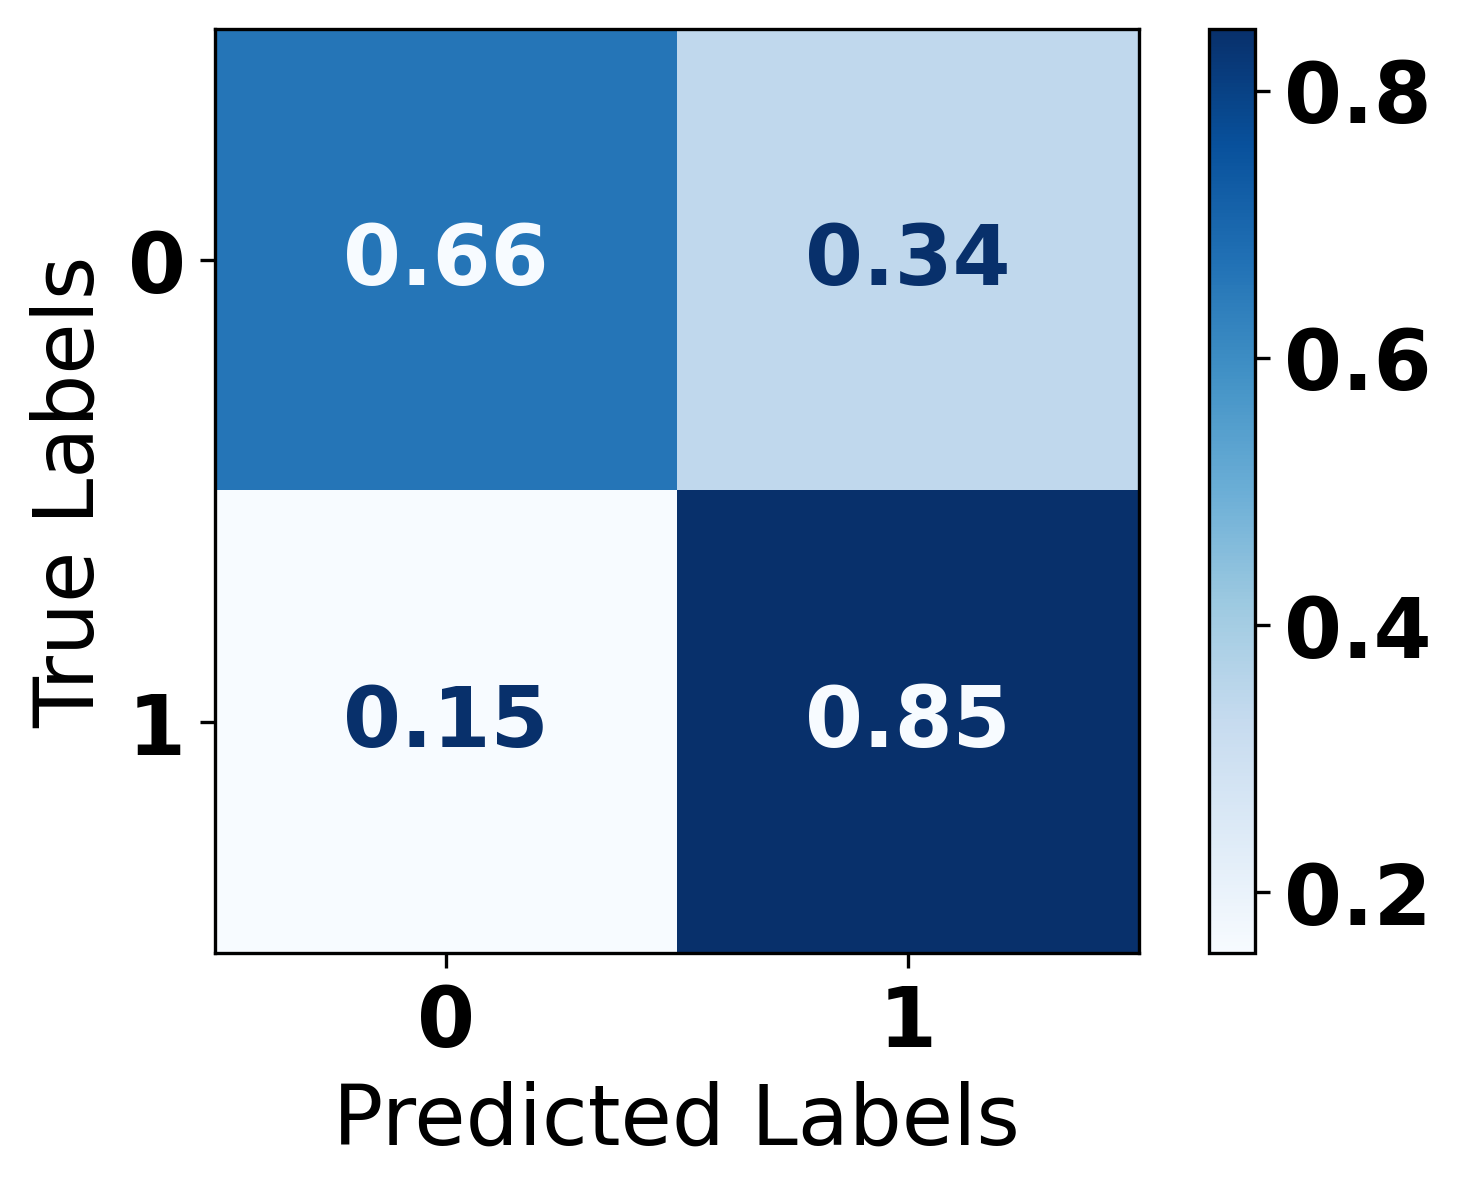

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.66      0.79     25505
     Class 1       0.14      0.85      0.24      1669

    accuracy                           0.67     27174
   macro avg       0.56      0.75      0.52     27174
weighted avg       0.93      0.67      0.76     27174

Train Accuracy: 0.7555133079847909
Test Accuracy: 0.6730330462942519


In [ ]:
# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

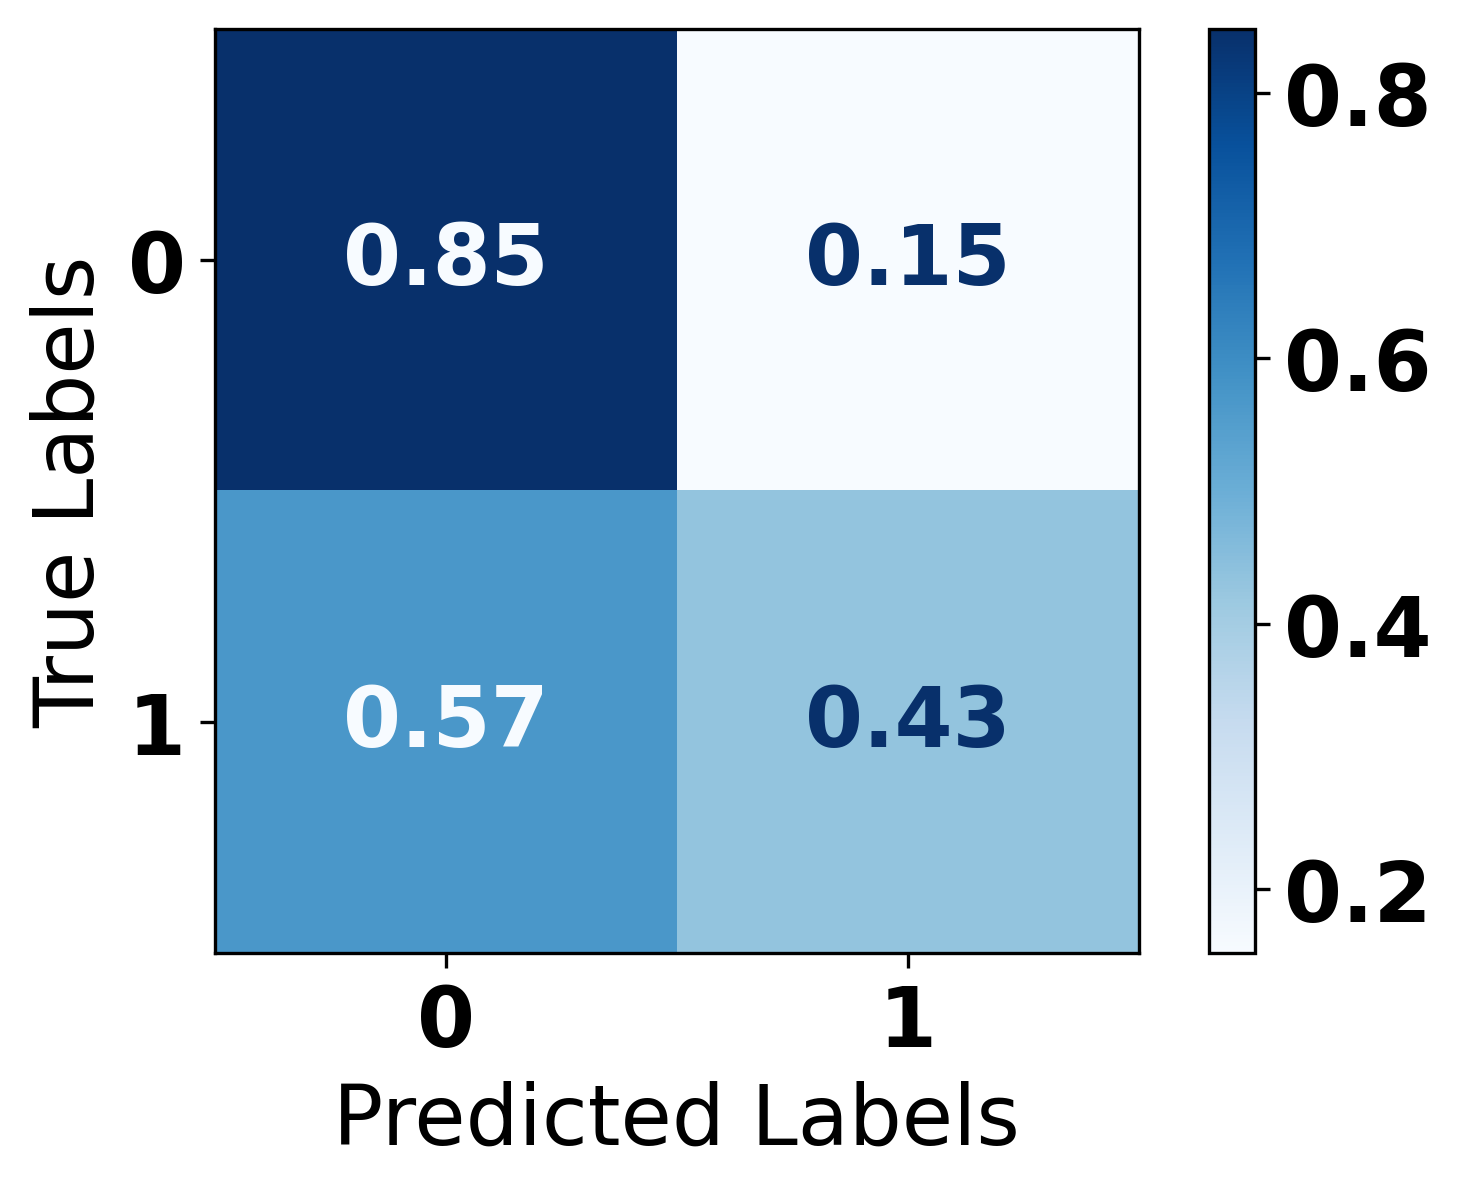

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     25505
           1       0.16      0.43      0.23      1669

    accuracy                           0.82     27174
   macro avg       0.56      0.64      0.56     27174
weighted avg       0.91      0.82      0.86     27174

Train Accuracy: 0.6474440219687368
Test Accuracy: 0.8224037683079414


In [ ]:
y_pred = RF.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

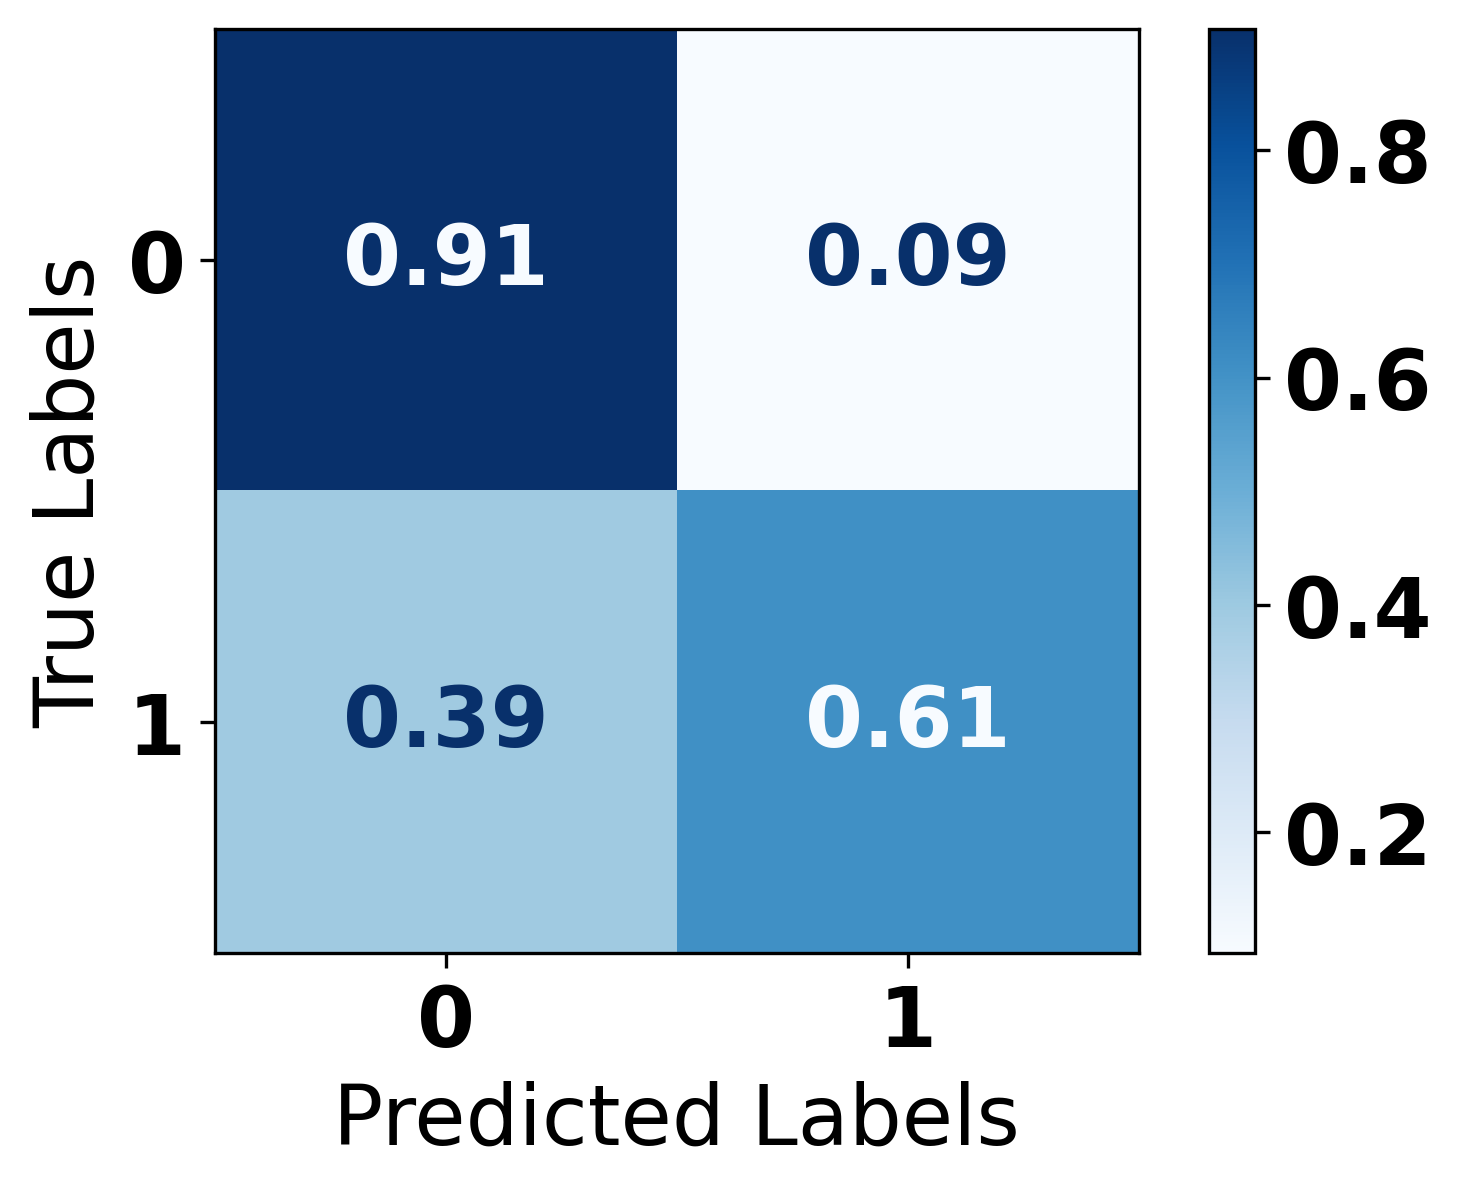

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     25505
           1       0.30      0.61      0.40      1669

    accuracy                           0.89     27174
   macro avg       0.64      0.76      0.67     27174
weighted avg       0.93      0.89      0.91     27174

Train Accuracy: 0.7569074778200253
Test Accuracy: 0.8884227570471774


In [ ]:
# Fit the classifier to the training data
y_pred = GNB.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

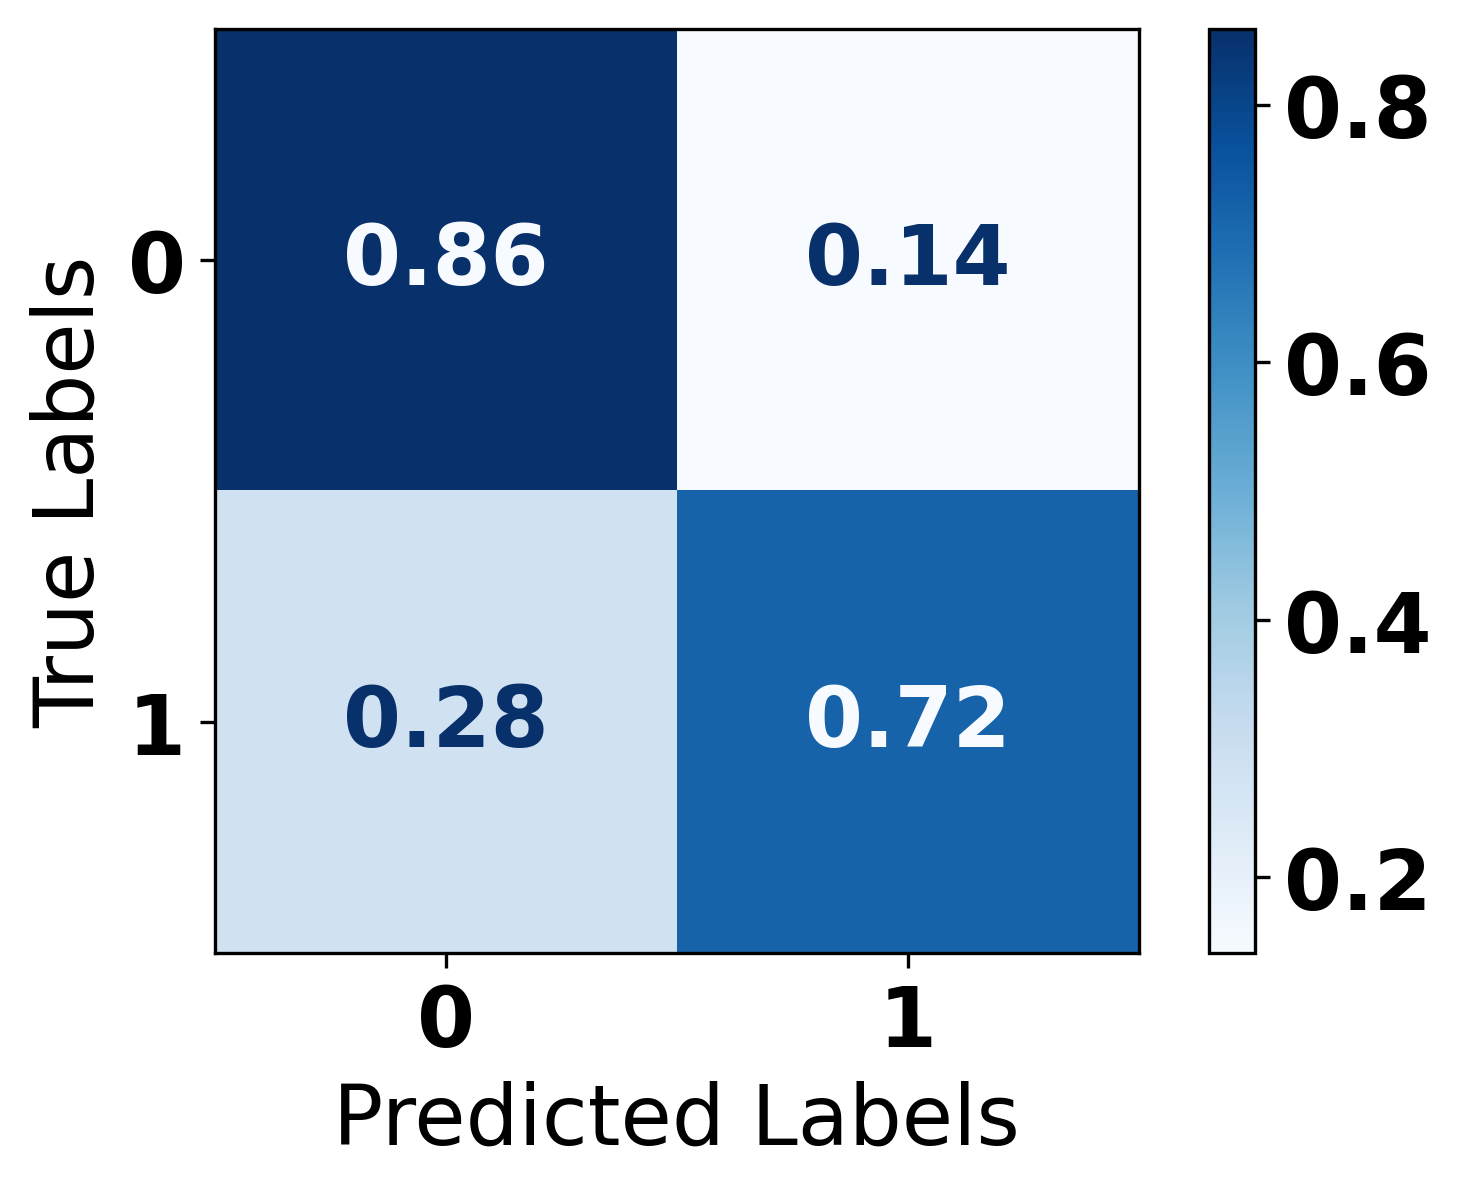

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91     25505
           1       0.25      0.72      0.37      1669

    accuracy                           0.85     27174
   macro avg       0.61      0.79      0.64     27174
weighted avg       0.93      0.85      0.88     27174

Train Accuracy: 0.7947190536544149
Test Accuracy: 0.8501140796349451


In [ ]:
# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

Normalized Confusion Matrix:
[[0.74989218 0.25010782]
 [0.24146195 0.75853805]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.75      0.85     25505
     Class 1       0.17      0.76      0.27      1669

    accuracy                           0.75     27174
   macro avg       0.57      0.75      0.56     27174
weighted avg       0.93      0.75      0.81     27174



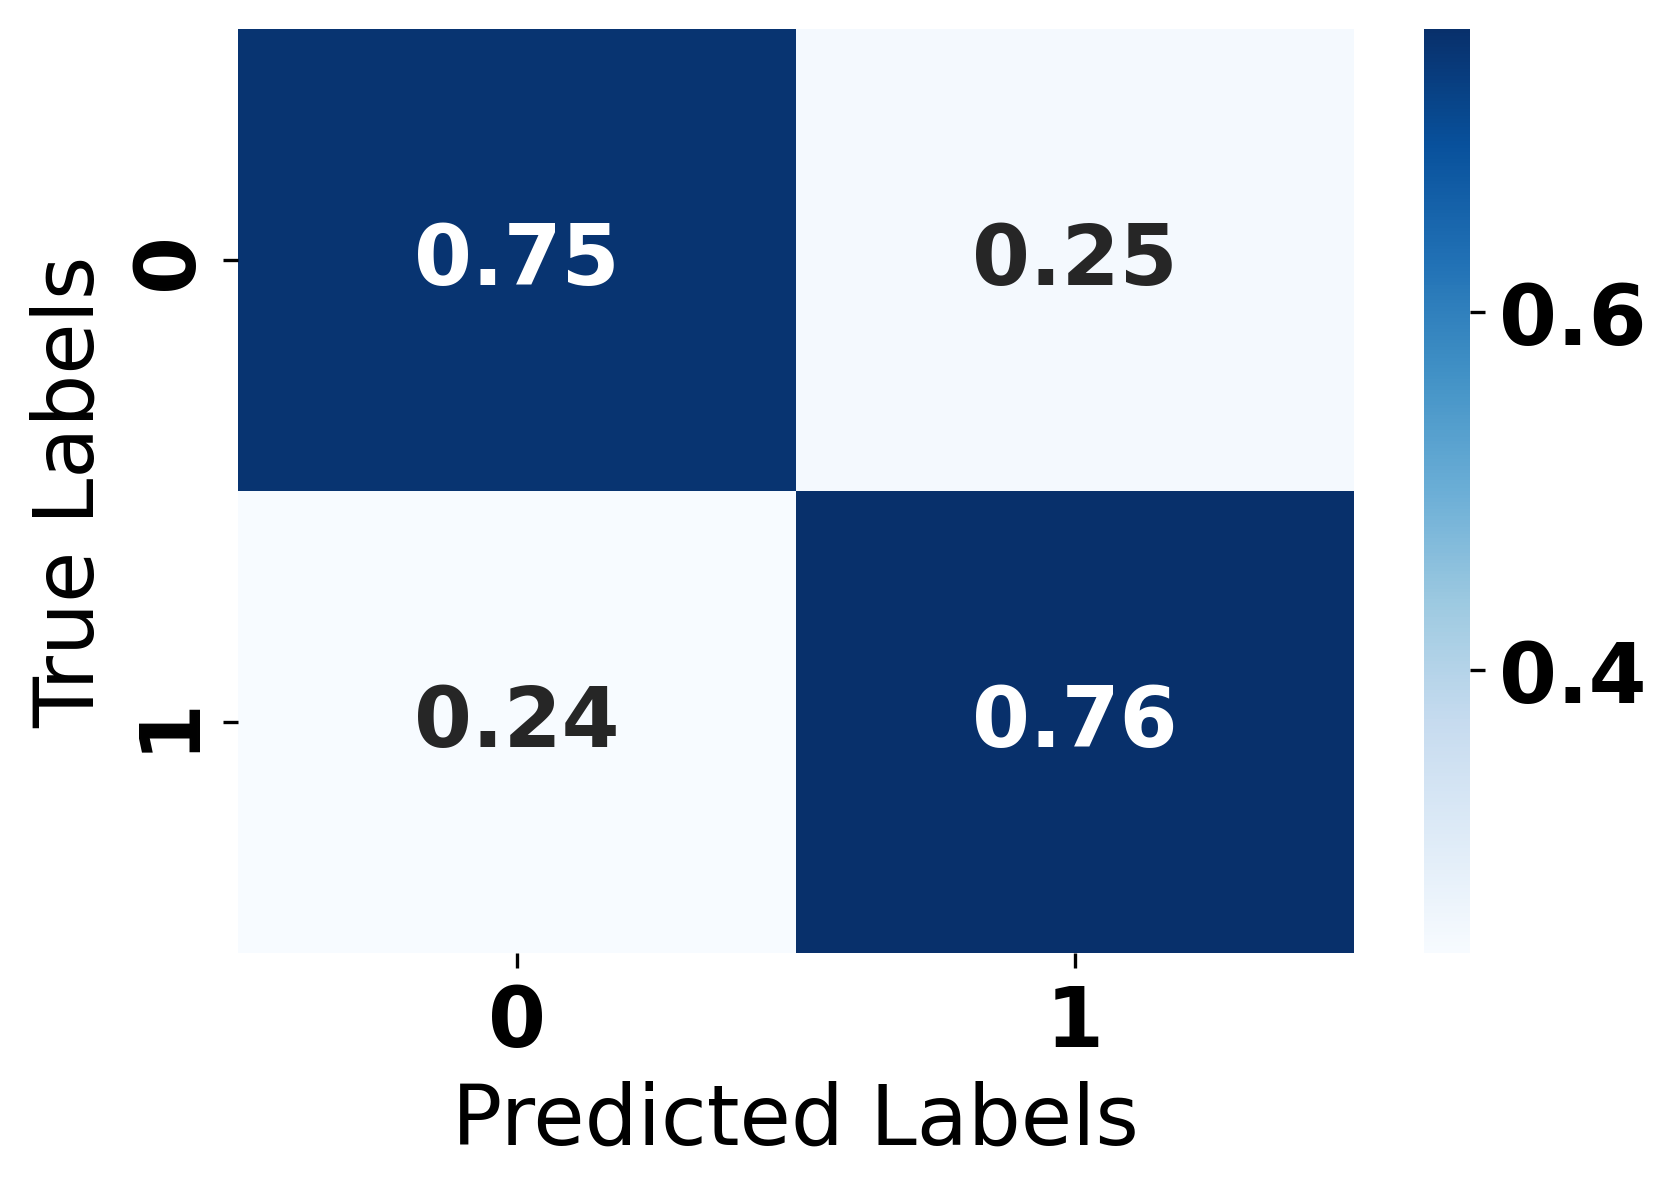

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

850/850 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Normalized Confusion Matrix:
[[0.87951382 0.12048618]
 [0.29119233 0.70880767]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.88      0.93     25505
     Class 1       0.28      0.71      0.40      1669

    accuracy                           0.87     27174
   macro avg       0.63      0.79      0.66     27174
weighted avg       0.94      0.87      0.89     27174



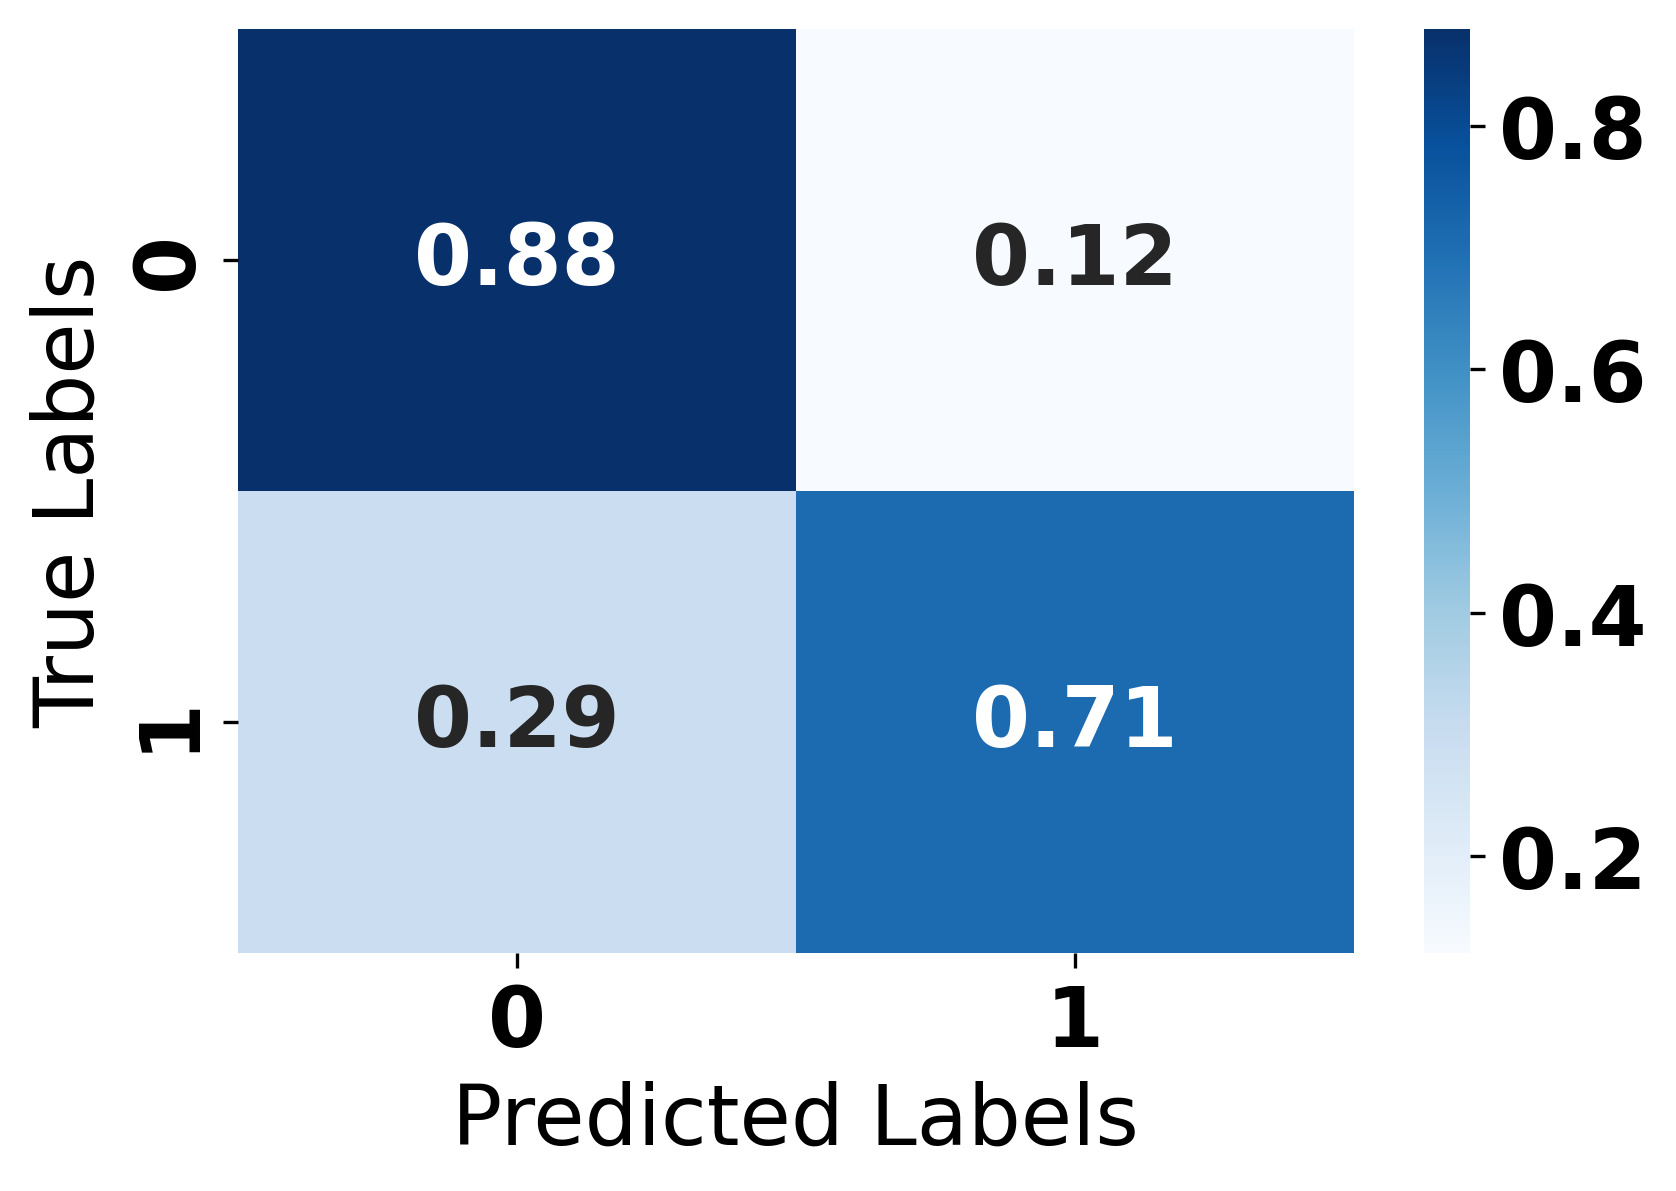

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

850/850 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
Normalized Confusion Matrix:
[[0.68206234 0.31793766]
 [0.11743559 0.88256441]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.68      0.81     25505
     Class 1       0.15      0.88      0.26      1669

    accuracy                           0.69     27174
   macro avg       0.57      0.78      0.53     27174
weighted avg       0.94      0.69      0.77     27174



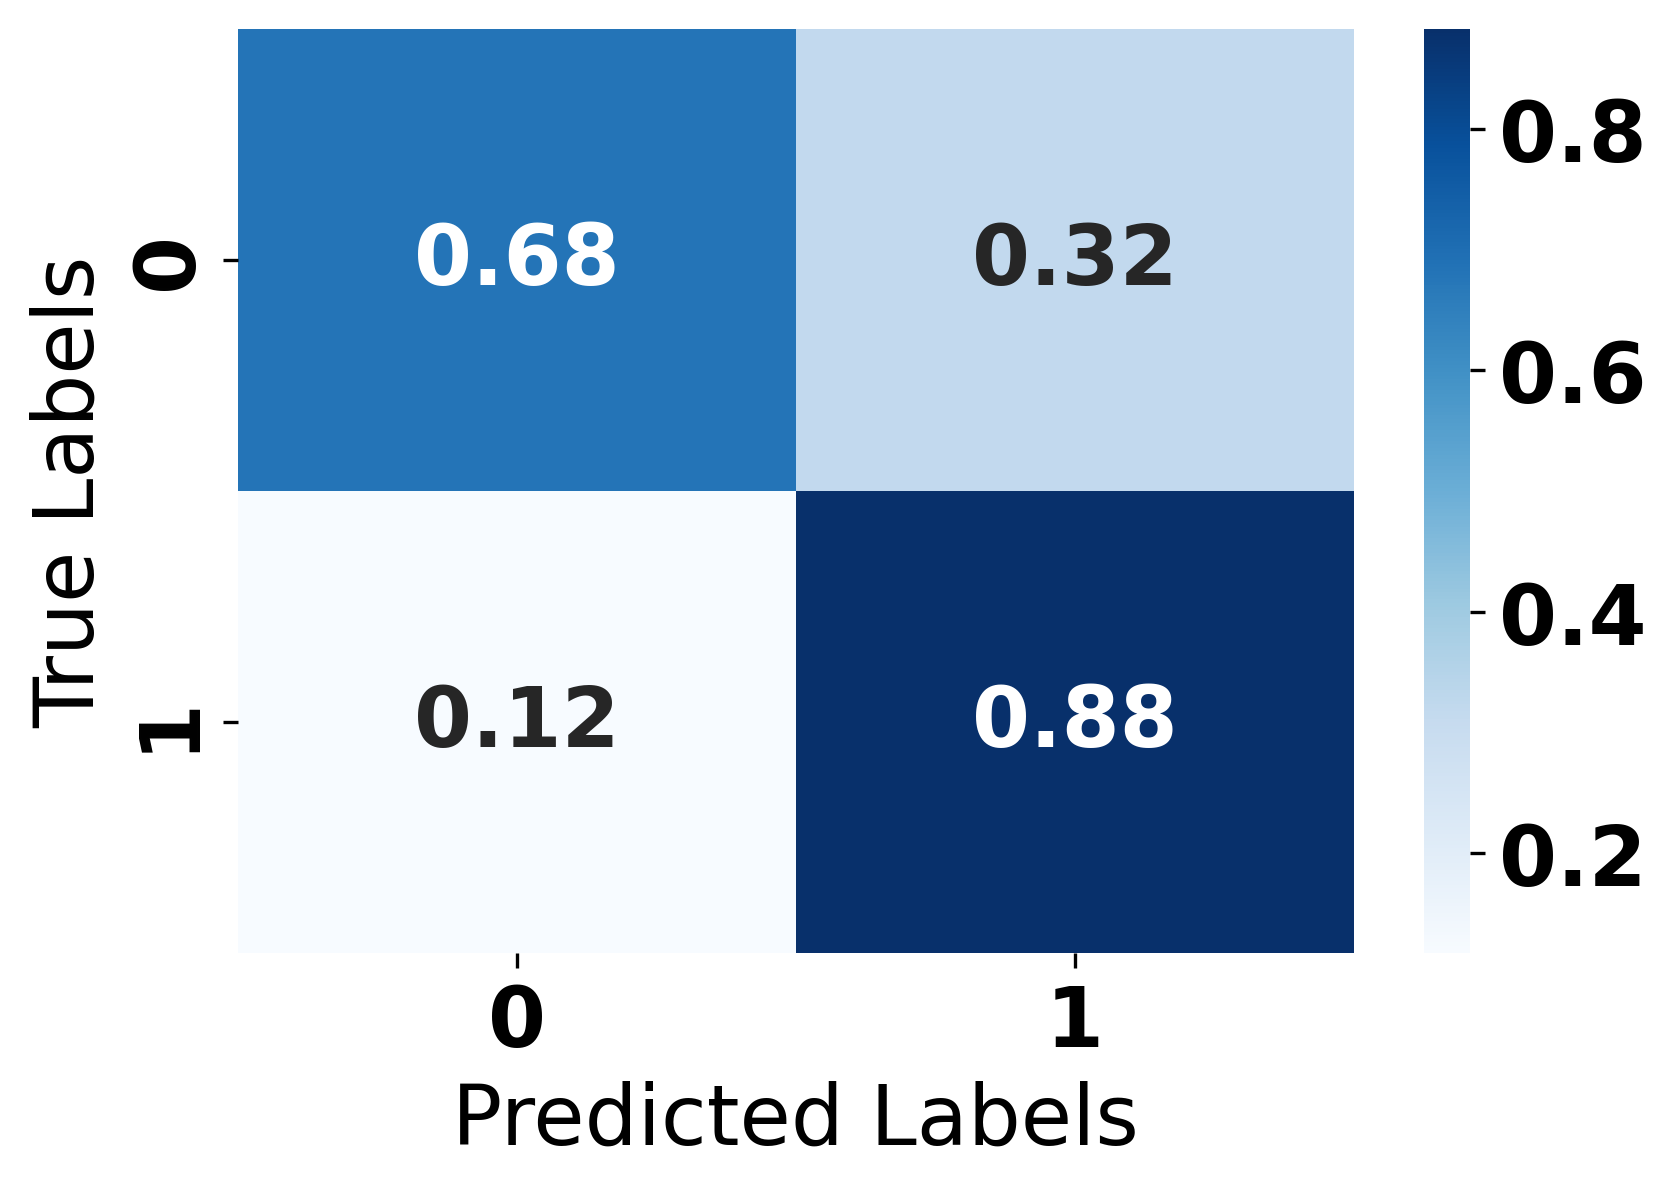

In [ ]:
# Predict probabilities on test data
y_pred_prob = ANN_Base.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.58
y_pred = np.where(y_pred_prob > 0.42, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.58)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Normalized Confusion Matrix:
[[0.8063517  0.1936483 ]
 [0.17974835 0.82025165]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.81      0.89     25505
     Class 1       0.22      0.82      0.34      1669

    accuracy                           0.81     27174
   macro avg       0.60      0.81      0.62     27174
weighted avg       0.94      0.81      0.85     27174



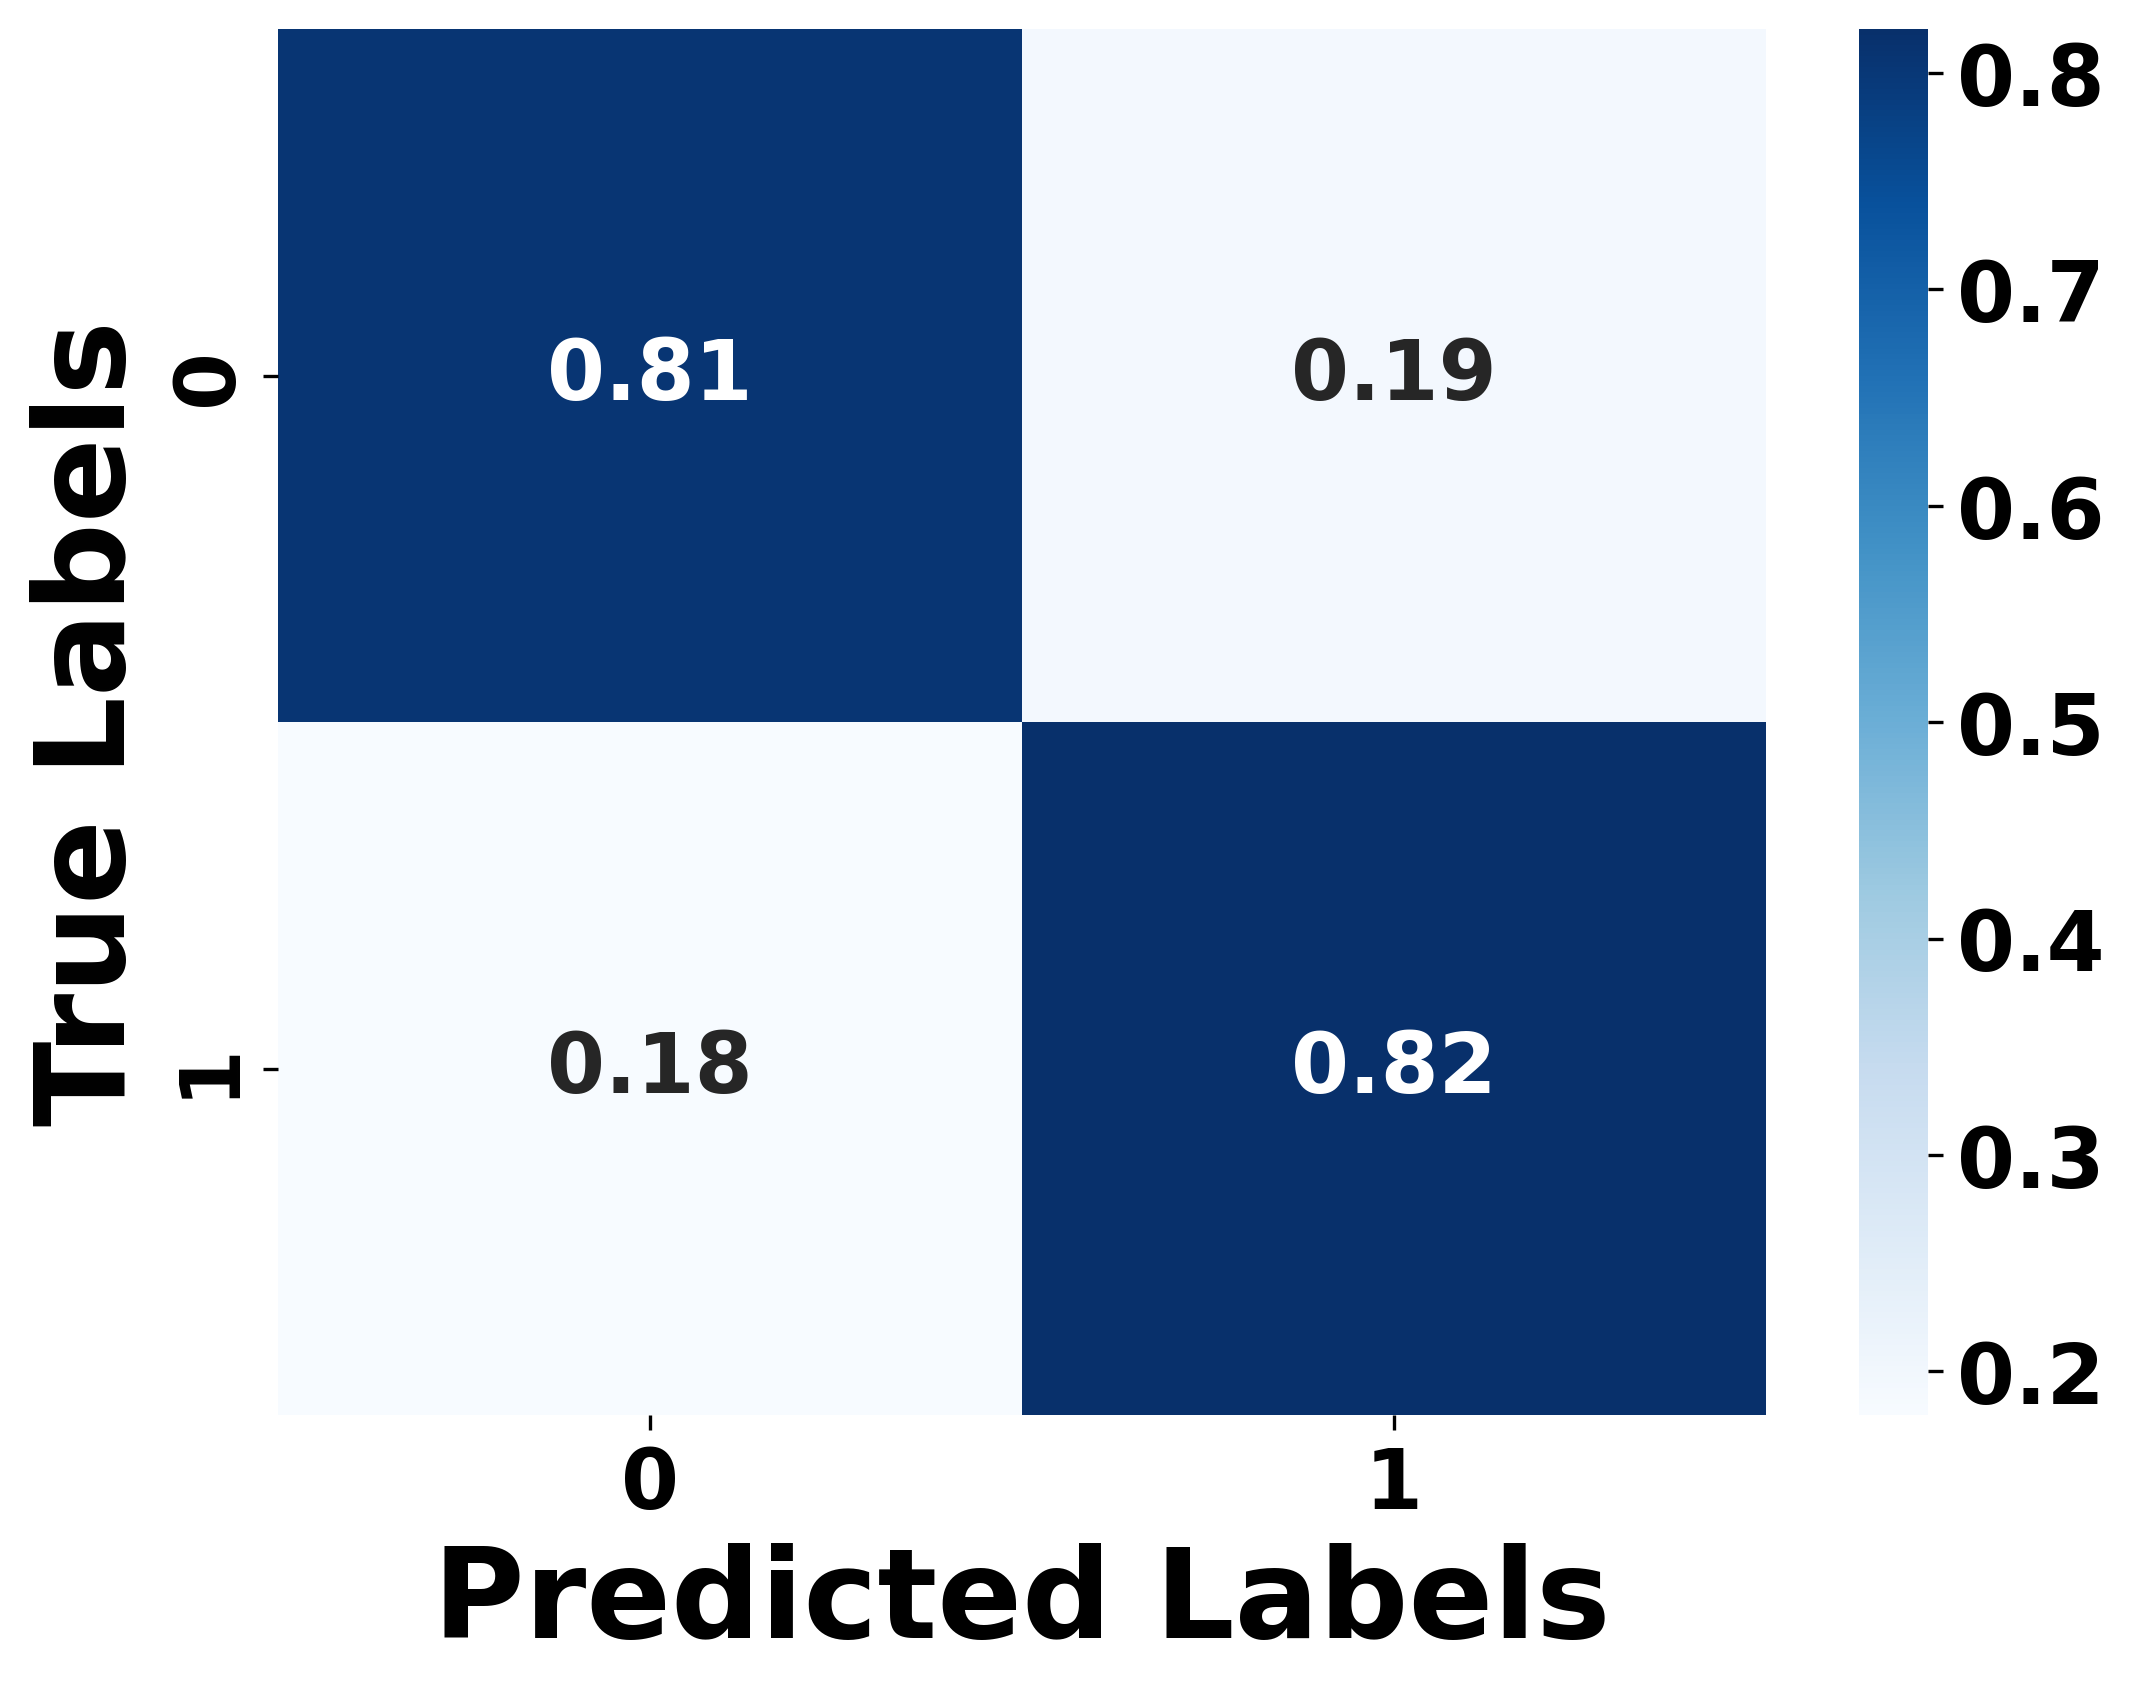

In [ ]:
# Predict probabilities on test data
y_pred_prob = grownet_tabular_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=30, weight='bold')
plt.xlabel('Predicted Labels', fontsize=30, weight='bold')
plt.ylabel('True Labels', fontsize=30, weight='bold')
plt.show()